In [ ]:
!pip install pm4py
!pip install -U cupy-cuda11x
# !pip uninstall -y seaborn
!pip install seaborn==0.13.0
# !pip uninstall -y matplotlib
!pip install matplotlib==3.7.3
import cupy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=f9aba3e08d8f51ef4c6a36df5995e1239c451dbc8b807b3fb378b0463f02d80d
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime version

In [ ]:
# 0.0 - Importing

log_df = pd.read_csv('https://raw.githubusercontent.com/paoloceravolo/BIS2022/main/Event%20Logs/sepsis%20cases%20-%20event%20log.csv',sep=',')
log_df['@@case_index'] = log_df['@@case_index'].apply(str)

# 0.1 - Renaming

log_df.rename(columns={'@@case_index': 'case:concept:name', 'case:concept:name': 'Case Name'}, inplace=True) #change the name to a colum
log_df['time:timestamp']= pd.to_datetime(log_df['time:timestamp'])

# 0.2 - Convert column to numeric, turning 'nan' strings to NaN values

log_df['LacticAcid'] = pd.to_numeric(log_df['LacticAcid'], errors='coerce')
log_df['Leucocytes'] = pd.to_numeric(log_df['Leucocytes'], errors='coerce')
log_df['CRP'] = pd.to_numeric(log_df['CRP'], errors='coerce')
log_df['start_timestamp'] = pd.to_datetime(log_df['start_timestamp'])


Nmber of events: 15214
Number of cases: 1050


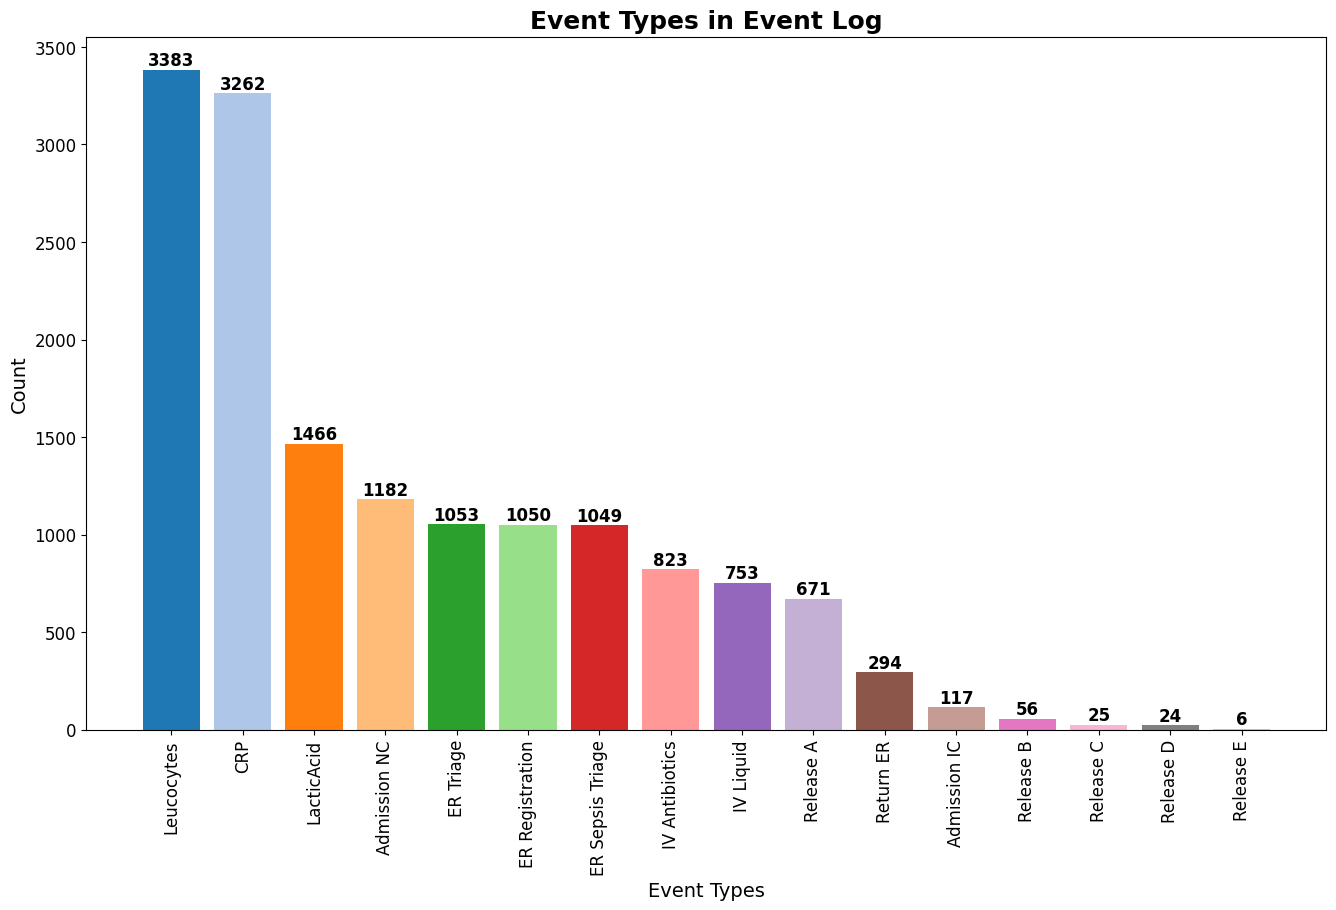

Start activities: {'ER Registration': 995, 'ER Sepsis Triage': 7, 'CRP': 10, 'Leucocytes': 18, 'IV Liquid': 14, 'ER Triage': 6}
End activities: {'Release A': 393, 'IV Antibiotics': 87, 'Return ER': 291, 'LacticAcid': 24, 'Admission NC': 14, 'CRP': 41, 'ER Sepsis Triage': 49, 'Leucocytes': 44, 'IV Liquid': 12, 'Release B': 55, 'Release E': 5, 'Release C': 19, 'Release D': 14, 'ER Triage': 2}


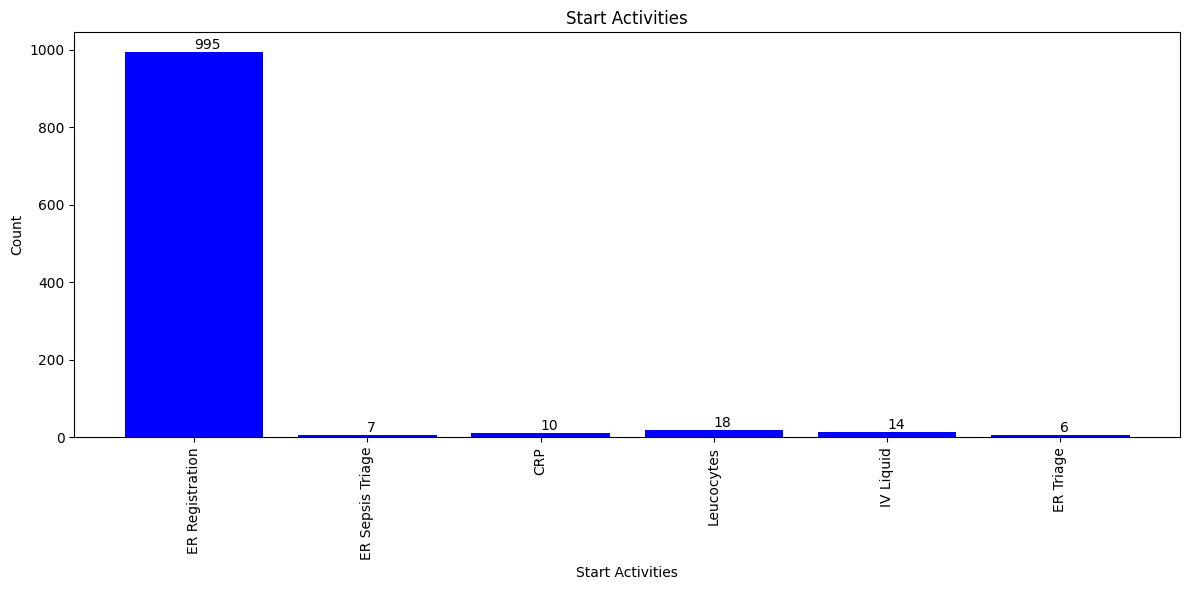

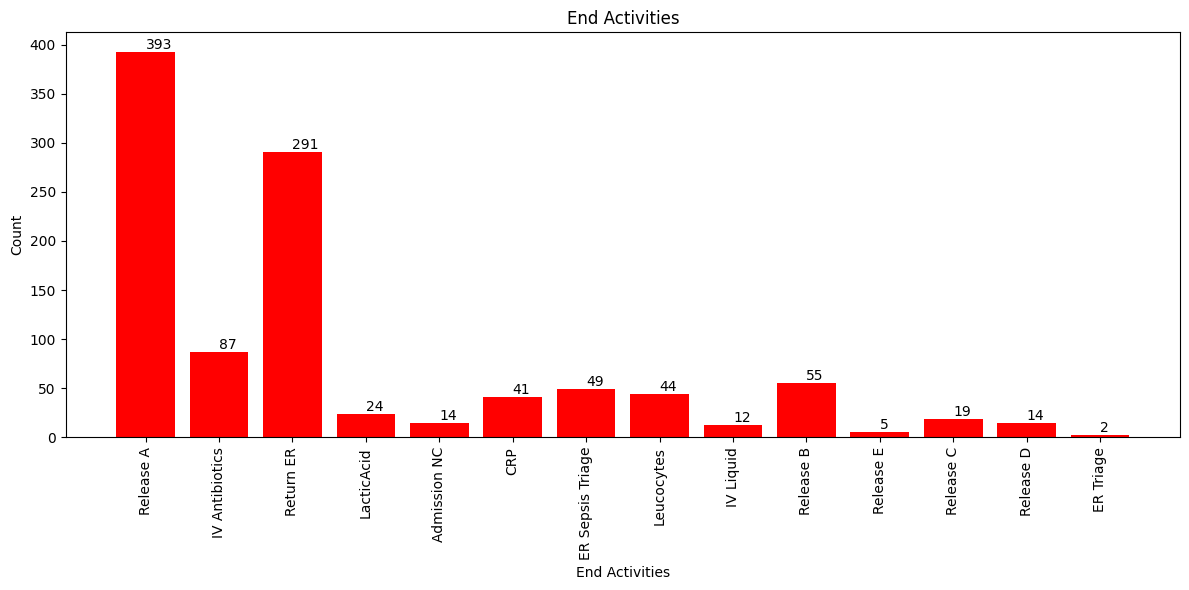

Index(['InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'concept:name', 'Age', 'DiagnosticIC',
       'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'time:timestamp', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos',
       'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose',
       'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG', '@@classifier',
       'case:concept:name', 'Case Name', 'Leucocytes', 'CRP', 'LacticAcid',
       'start_timestamp', '@@event_index'],
      dtype='object')


In [ ]:
# 0.3 Plotting the activity distribution of log_df

num_events = len(log_df)
num_cases = len(log_df['case:concept:name'].unique())
print("Nmber of events: {}\nNumber of cases: {}".format(num_events, num_cases))

# Plot all event types as a chart
if 'concept:name' in log_df.columns:
    log_df['concept:name'] = log_df['concept:name'].astype(str).fillna('Unknown')
    event_type_counts = log_df['concept:name'].value_counts()

    # Plot all event types as a bar chart with enhanced visibility and colors
    plt.figure(figsize=(16, 9))  # Increase the figure size
    colors = plt.cm.tab20.colors  # Use a colormap with 20 distinct colors
    bars = plt.bar(event_type_counts.index, event_type_counts.values, color=colors[:len(event_type_counts)])

    plt.xlabel('Event Types', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Event Types in Event Log', fontsize=18, weight='bold')
    plt.xticks(rotation=90, fontsize=12)  # Rotate x labels for better readability
    plt.yticks(fontsize=12)

    # Add counts on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=12, ha='center', weight='bold')

    plt.show()

start_activities = pm4py.get_start_activities(log_df)
end_activities = pm4py.get_end_activities(log_df)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

start_activities_df = pd.DataFrame(list(start_activities.items()), columns=['Activity', 'Count'])
end_activities_df = pd.DataFrame(list(end_activities.items()), columns=['Activity', 'Count'])



# Plot start activities
plt.figure(figsize=(12, 6))
bars = plt.bar(start_activities_df['Activity'], start_activities_df['Count'], color='blue')
plt.xlabel('Start Activities')
plt.ylabel('Count')
plt.title('Start Activities')
plt.xticks(rotation=90)

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()

# Plot end activities
plt.figure(figsize=(12, 6))
bars = plt.bar(end_activities_df['Activity'], end_activities_df['Count'], color='red')
plt.xlabel('End Activities')
plt.ylabel('Count')
plt.title('End Activities')
plt.xticks(rotation=90)

# Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()
print(log_df.keys())




In [ ]:
# 1.1 LOG FILTERING - wrong values in Leuocytes CRP and LactidAcid
num_events = len(log_df)
num_cases = len(log_df['case:concept:name'].unique())
print("Before filtering: Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

# 1.1.1 - Identify cases where all three columns (Leucocytes, CRP, LacticAcid) are null or 0.0
cases_with_nulls_or_zeros = log_df.groupby('case:concept:name').apply(
    lambda df: df[['Leucocytes', 'CRP', 'LacticAcid']].apply(lambda x: x.isnull().all() or (x == 0.0).all(), axis=1).all()
).reset_index(name='AllNullsOrZeros')

# 1.1.2 - Print cases where AllNullsOrZeros is True
cases_with_all_nulls_or_zeros = cases_with_nulls_or_zeros[cases_with_nulls_or_zeros['AllNullsOrZeros'] == True]['case:concept:name'].tolist()
print("Cases where all events have null or 0.0 values for Leucocytes, CRP, and LacticAcid:")
print(cases_with_all_nulls_or_zeros, len(cases_with_all_nulls_or_zeros))

# 1.1.3 - Filter out cases where all three columns are null or 0.0
filtered_log = log_df[~log_df['case:concept:name'].isin(cases_with_all_nulls_or_zeros)].copy()

# 1.1.4 - Summary statistics after filtering null or 0.0 values
num_events = len(filtered_log)
num_cases = len(filtered_log['case:concept:name'].unique())
print("After first filtering: Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Before filtering: Number of events: 15214
Number of cases: 1050
Cases where all events have null or 0.0 values for Leucocytes, CRP, and LacticAcid:
['1006', '119', '129', '135', '158', '169', '189', '311', '323', '326', '344', '369', '410', '428', '475', '497', '517', '54', '601', '612', '662', '677', '702', '705', '720', '764', '775', '785', '803', '820', '856', '861', '881', '886', '933', '937', '951', '959'] 38
After first filtering: Number of events: 15090
Number of cases: 1012


In [ ]:
# 1.2 LOG FILTERING - start/end activities

# 1.2.1 - Filter end activities
filtered_log = pm4py.filter_end_activities(filtered_log, ['Release A', 'Release B', 'Release E', 'Release C', 'Release D', 'Return ER'])

# 1.2.2 - Filter start activities
filtered_log = pm4py.filter_start_activities(filtered_log, ['ER Registration', 'ER Sepsis Triage', 'ER Triage'])

print("After second filtering: Given {} total cases in the log we have {} cases that comply with constraints for complete cases".format(num_cases,len(filtered_log['case:concept:name'].unique())))


# 1.2.3 - Get start and end activities
start_activities = pm4py.get_start_activities(filtered_log)
end_activities = pm4py.get_end_activities(filtered_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

# 1.2.4 - Convert start and end activities to DataFrames for plotting
start_activities_df = pd.DataFrame(list(start_activities.items()), columns=['Activity', 'Count'])
end_activities_df = pd.DataFrame(list(end_activities.items()), columns=['Activity', 'Count'])


After second filtering: Given 1012 total cases in the log we have 741 cases that comply with constraints for complete cases
Start activities: {'ER Registration': 732, 'ER Sepsis Triage': 5, 'ER Triage': 4}
End activities: {'Release A': 375, 'Return ER': 282, 'Release B': 50, 'Release E': 5, 'Release C': 16, 'Release D': 13}


In [ ]:
# 1.3 - LOG FILTERING - minimal number of events

def filter_and_sort_cases(log, min_activities=4):
    # 1.3.1 - Count the number of activities per case
    case_lengths = log.groupby('case:concept:name').size()

    # 1.3.2 - Sort cases by the number of activities in ascending order
    sorted_cases = case_lengths.sort_values(ascending=True)

    # 1.3.3 - Get cases that have more than min_activities activities
    valid_cases = sorted_cases[sorted_cases > min_activities].index

    # 1.3.4 - Filter the log to include only valid cases
    return log[log['case:concept:name'].isin(valid_cases)]

filtered_log = filter_and_sort_cases(filtered_log, min_activities=4)


In [ ]:
# # 1.4 - LOG FILTERING - Filtering the Return ER with too big duration of return (patient returned to hospital, but it's not connected to sepsis case, because he returned for ex. after 60 days)
# cases_to_remove = []

# for case_name, group in filtered_log.groupby('case:concept:name'):
#     # Sort the group by 'start_timestamp'
#     group = group.sort_values(by='start_timestamp')

#     # Check if 'Return ER' is in the case
#     if 'Return ER' in group['concept:name'].values:
#         # Find the index of the 'Return ER' event
#         return_er_index = group[group['concept:name'] == 'Return ER'].index[0]

#         # Find the event before 'Return ER'
#         previous_event_index = group.index[group.index.get_loc(return_er_index) - 1]

#         # Calculate the time to return
#         return_time = group.loc[return_er_index, 'start_timestamp']
#         previous_event_time = group.loc[previous_event_index, 'start_timestamp']
#         time_to_return = (return_time - previous_event_time).days

#         # If the time to return is more than 30 days, add the case to the removal list
#         if time_to_return > 30:
#             cases_to_remove.append(case_name)

# print(cases_to_remove)
# print(len(cases_to_remove))
# # Filter out cases that meet the criteria
# filtered_log = filtered_log[~filtered_log['case:concept:name'].isin(cases_to_remove)]



['101', '1016', '1019', '1029', '1038', '1039', '107', '108', '110', '112', '12', '134', '136', '14', '141', '148', '163', '168', '17', '170', '171', '175', '176', '178', '182', '183', '184', '186', '187', '191', '199', '205', '211', '221', '228', '232', '234', '238', '245', '246', '249', '257', '27', '270', '272', '275', '28', '285', '288', '29', '296', '300', '305', '314', '315', '319', '322', '329', '33', '342', '350', '353', '357', '36', '363', '368', '378', '387', '391', '394', '396', '400', '401', '416', '419', '42', '421', '426', '429', '43', '434', '44', '449', '460', '465', '493', '499', '509', '518', '52', '526', '527', '529', '534', '538', '541', '543', '544', '547', '55', '556', '56', '566', '57', '571', '572', '577', '578', '58', '59', '594', '596', '603', '607', '62', '633', '637', '638', '639', '640', '649', '658', '667', '668', '671', '675', '676', '681', '69', '690', '694', '697', '7', '711', '712', '726', '733', '748', '75', '752', '754', '761', '771', '780', '783', '

In [ ]:
# 1.5 - LOG FILTERING - Filtering the  with too big duration of case - Adding relevant columns
# 1.5.1 - Covert timestamp column

filtered_log['start_timestamp'] = pd.to_datetime(filtered_log['start_timestamp'])

# 1.5.2 - Mark the first event of each case
filtered_log['is_first_event_in_case'] = filtered_log.groupby('case:concept:name').cumcount() == 0

# 1.5.3 - Mark the last event of each case
last_event_values = ['Release A', 'Release B', 'Release E', 'Release C', 'Release D', 'Return ER']
filtered_log['is_last_event_temp'] = filtered_log['concept:name'].isin(last_event_values)
filtered_log['is_last_event_in_case'] = filtered_log['is_last_event_temp'] & ~filtered_log['is_last_event_temp'].shift(-1, fill_value=False)
filtered_log['is_last_event_in_case'] = filtered_log['is_last_event_in_case'].astype(bool)
filtered_log.drop(columns=['is_last_event_temp'], inplace=True)

# 1.5.4 - Add duration columns
filtered_log.loc[:, 'duration_in_days_of_case'] = pd.NaT
filtered_log.loc[:, 'duration_in_minutes_of_case'] = pd.NaT

for case_name, group in filtered_log.groupby('case:concept:name'):
    first_index = group[group['is_first_event_in_case']].index
    last_index = group[group['is_last_event_in_case']].index

    if not first_index.empty and not last_index.empty:
        first_index = first_index[0]
        last_index = last_index[-1]

        duration_in_minutes_of_case = (group.loc[last_index, 'start_timestamp'] - group.loc[first_index, 'start_timestamp']).total_seconds() / 60

        filtered_log.loc[first_index, 'duration_in_days_of_case'] = int(duration_in_minutes_of_case / (24 * 60))
        filtered_log.loc[first_index, 'duration_in_minutes_of_case'] = int(duration_in_minutes_of_case)




In [ ]:
# 1.5.5 - LOG FILTERING  - Step 2 - Removing the cases with too big duration
cases_to_remove = []

for case_name, group in filtered_log.groupby('case:concept:name'):
    first_index = group[group['is_first_event_in_case']].index
    last_index = group[group['is_last_event_in_case']].index

    if not first_index.empty and not last_index.empty:
        first_index = first_index[0]
        last_index = last_index[-1]

        # Calculate duration in minutes
        duration_in_minutes_of_case = (group.loc[last_index, 'start_timestamp'] -
                                       group.loc[first_index, 'start_timestamp']).total_seconds() / 60

        # Convert duration to days and store in DataFrame
        filtered_log.at[first_index, 'duration_in_days_of_case'] = duration_in_minutes_of_case // (24 * 60)
        filtered_log.at[first_index, 'duration_in_minutes_of_case'] = duration_in_minutes_of_case

        # If the duration time is above 80 days, mark the case for removal
        duration_in_days_of_case = duration_in_minutes_of_case / (24 * 60)
        if duration_in_days_of_case > 80:
            cases_to_remove.append(case_name)

print(cases_to_remove)
# Filter out cases that meet the criteria
filtered_log = filtered_log[~filtered_log['case:concept:name'].isin(cases_to_remove)]



['101', '1016', '107', '108', '110', '112', '134', '136', '14', '148', '163', '168', '17', '170', '171', '175', '176', '182', '183', '184', '199', '205', '211', '221', '232', '234', '245', '246', '257', '27', '270', '272', '275', '285', '288', '305', '319', '322', '329', '342', '353', '36', '363', '368', '378', '387', '391', '394', '396', '400', '401', '419', '421', '426', '429', '43', '449', '460', '493', '499', '507', '509', '518', '52', '526', '529', '534', '538', '543', '544', '547', '55', '556', '56', '566', '57', '571', '572', '577', '578', '58', '59', '594', '596', '603', '62', '633', '638', '639', '640', '649', '658', '667', '668', '675', '676', '681', '69', '690', '7', '712', '733', '752', '761', '771', '783', '802', '839', '866', '87', '910', '916', '918', '928', '969', '972']


In [ ]:
# 1.5. - Summary statistics for filtered activites

num_cases = len(log_df['case:concept:name'].unique())
num_filtered_cases = len(filtered_log['case:concept:name'].unique())
print("Given {} total cases in the log, we have {} cases that comply with constraints for complete cases.".format(num_cases, num_filtered_cases))
print("Given {} total  events  in the log, we have {} events that comply with constraints for complete cases.".format(len(log_df), len(filtered_log)))




Given 1050 total cases in the log, we have 625 cases that comply with constraints for complete cases.
Given 15214 total  events  in the log, we have 10437 events that comply with constraints for complete cases.


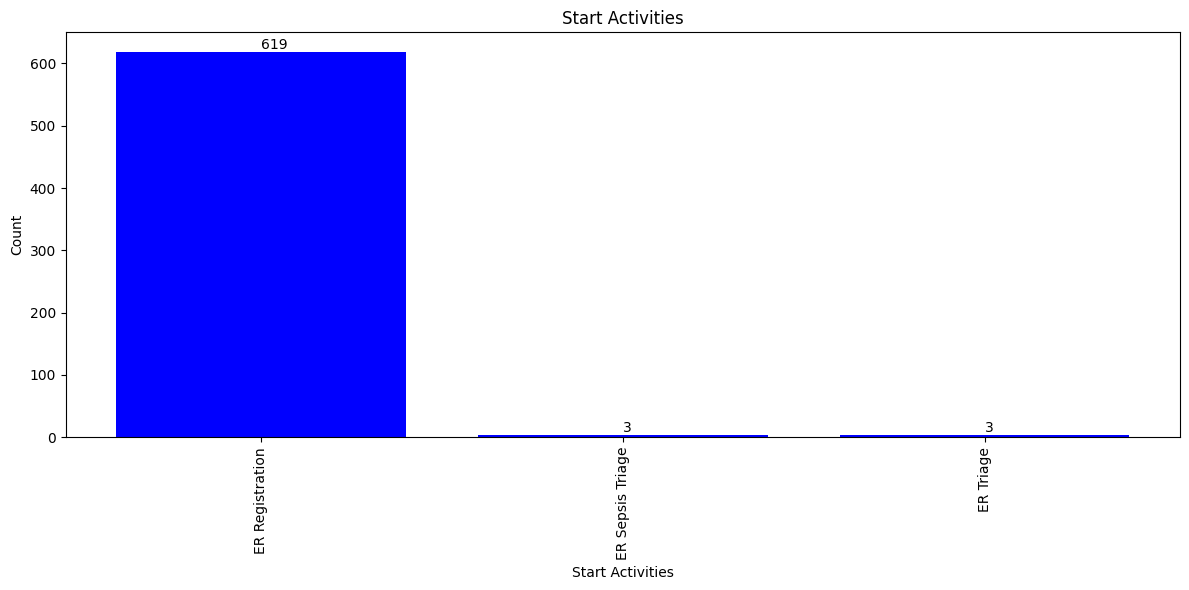

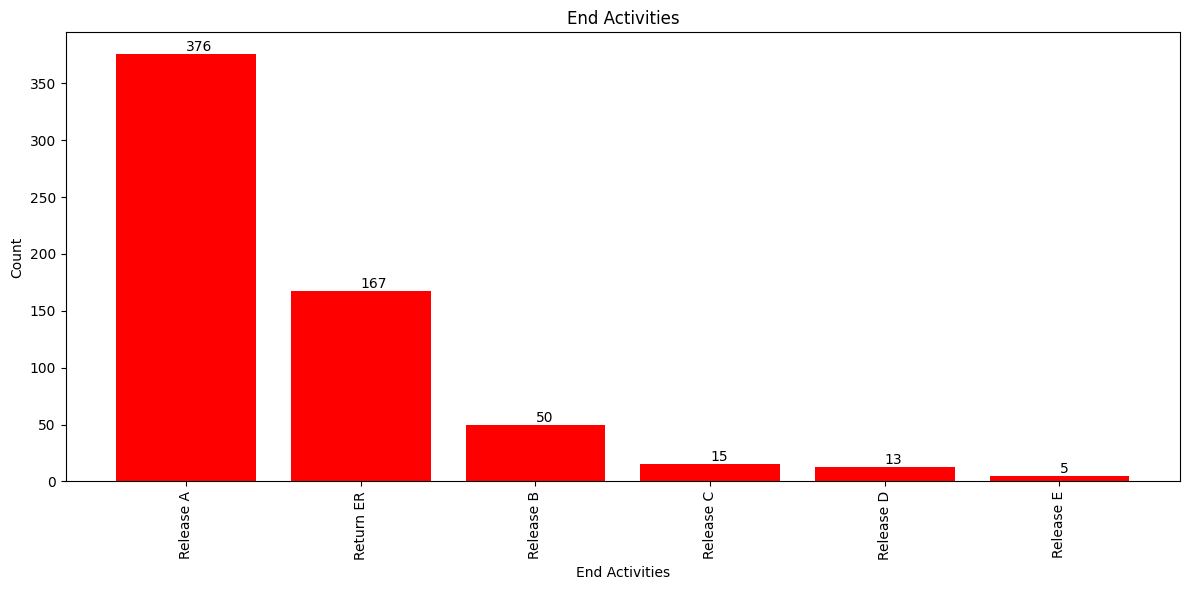

In [ ]:
# 1.6 - Calculate start activities
start_activities = filtered_log[filtered_log['is_first_event_in_case']]['concept:name'].value_counts().reset_index()
start_activities.columns = ['Activity', 'Count']

# 1.6.1 - Calculate end activities
end_activities = filtered_log[filtered_log['is_last_event_in_case']]['concept:name'].value_counts().reset_index()
end_activities.columns = ['Activity', 'Count']

# print(start_activities)
# print(end_activities)

# 1.6.2 - Plot start activities
plt.figure(figsize=(12, 6))
bars = plt.bar(start_activities['Activity'], start_activities['Count'], color='blue')
plt.xlabel('Start Activities')
plt.ylabel('Count')
plt.title('Start Activities')
plt.xticks(rotation=90)

# 1.6.3 - Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()

# 1.6.4 - Plot end activities
plt.figure(figsize=(12, 6))
bars = plt.bar(end_activities['Activity'], end_activities['Count'], color='red')
plt.xlabel('End Activities')
plt.ylabel('Count')
plt.title('End Activities')
plt.xticks(rotation=90)

# 1.6.5 - Add numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()



In [ ]:
# # Sorting
# filtered_log = filtered_log.sort_values(by=['case:concept:name', 'start_timestamp'])


# # Sort the DataFrame by 'case:concept:name' and 'start_timestamp'
# filtered_log = filtered_log.sort_values(by=['case:concept:name', 'start_timestamp'])

# print(filtered_log[['case:concept:name', 'start_timestamp']].head(20))

In [ ]:
# 2.1 - Identify cases that contain the 'Return ER' event
cases_with_return_er = filtered_log[filtered_log['concept:name'] == 'Return ER']['case:concept:name'].unique()
cases_with_return_er = set(cases_with_return_er)

# 2.1.1 - Split the event log into two groups: cases with 'Return ER' and cases without 'Return ER'
log_with_return_er = filtered_log[filtered_log['case:concept:name'].isin(cases_with_return_er)].copy()
log_without_return_er = filtered_log[~filtered_log['case:concept:name'].isin(cases_with_return_er)].copy()

# 2.1.2 - Summary statistics for the two groups
num_events_with_return_er = len(log_with_return_er)
num_cases_with_return_er = len(log_with_return_er['case:concept:name'].unique())
num_events_without_return_er = len(log_without_return_er)
num_cases_without_return_er = len(log_without_return_er['case:concept:name'].unique())

print("With 'Return ER': Number of events: {}\nNumber of cases: {}".format(num_events_with_return_er, num_cases_with_return_er))
print("Without 'Return ER': Number of events: {}\nNumber of cases: {}".format(num_events_without_return_er, num_cases_without_return_er))


With 'Return ER': Number of events: 3189
Number of cases: 167
Without 'Return ER': Number of events: 7248
Number of cases: 458


{('Admission IC', 'Admission NC'): 1, ('Admission IC', 'CRP'): 9, ('Admission IC', 'LacticAcid'): 9, ('Admission IC', 'Leucocytes'): 8, ('Admission NC', 'Admission IC'): 5, ('Admission NC', 'Admission NC'): 49, ('Admission NC', 'CRP'): 79, ('Admission NC', 'ER Triage'): 1, ('Admission NC', 'IV Antibiotics'): 1, ('Admission NC', 'IV Liquid'): 3, ('Admission NC', 'LacticAcid'): 6, ('Admission NC', 'Leucocytes'): 100, ('Admission NC', 'Release A'): 25, ('CRP', 'Admission IC'): 3, ('CRP', 'Admission NC'): 34, ('CRP', 'CRP'): 74, ('CRP', 'ER Sepsis Triage'): 7, ('CRP', 'ER Triage'): 1, ('CRP', 'IV Antibiotics'): 11, ('CRP', 'IV Liquid'): 21, ('CRP', 'LacticAcid'): 147, ('CRP', 'Leucocytes'): 356, ('CRP', 'Release A'): 77, ('CRP', 'Release C'): 2, ('CRP', 'Release D'): 4, ('ER Registration', 'Admission IC'): 1, ('ER Registration', 'CRP'): 3, ('ER Registration', 'ER Sepsis Triage'): 4, ('ER Registration', 'ER Triage'): 161, ('ER Registration', 'IV Liquid'): 3, ('ER Registration', 'Leucocytes'

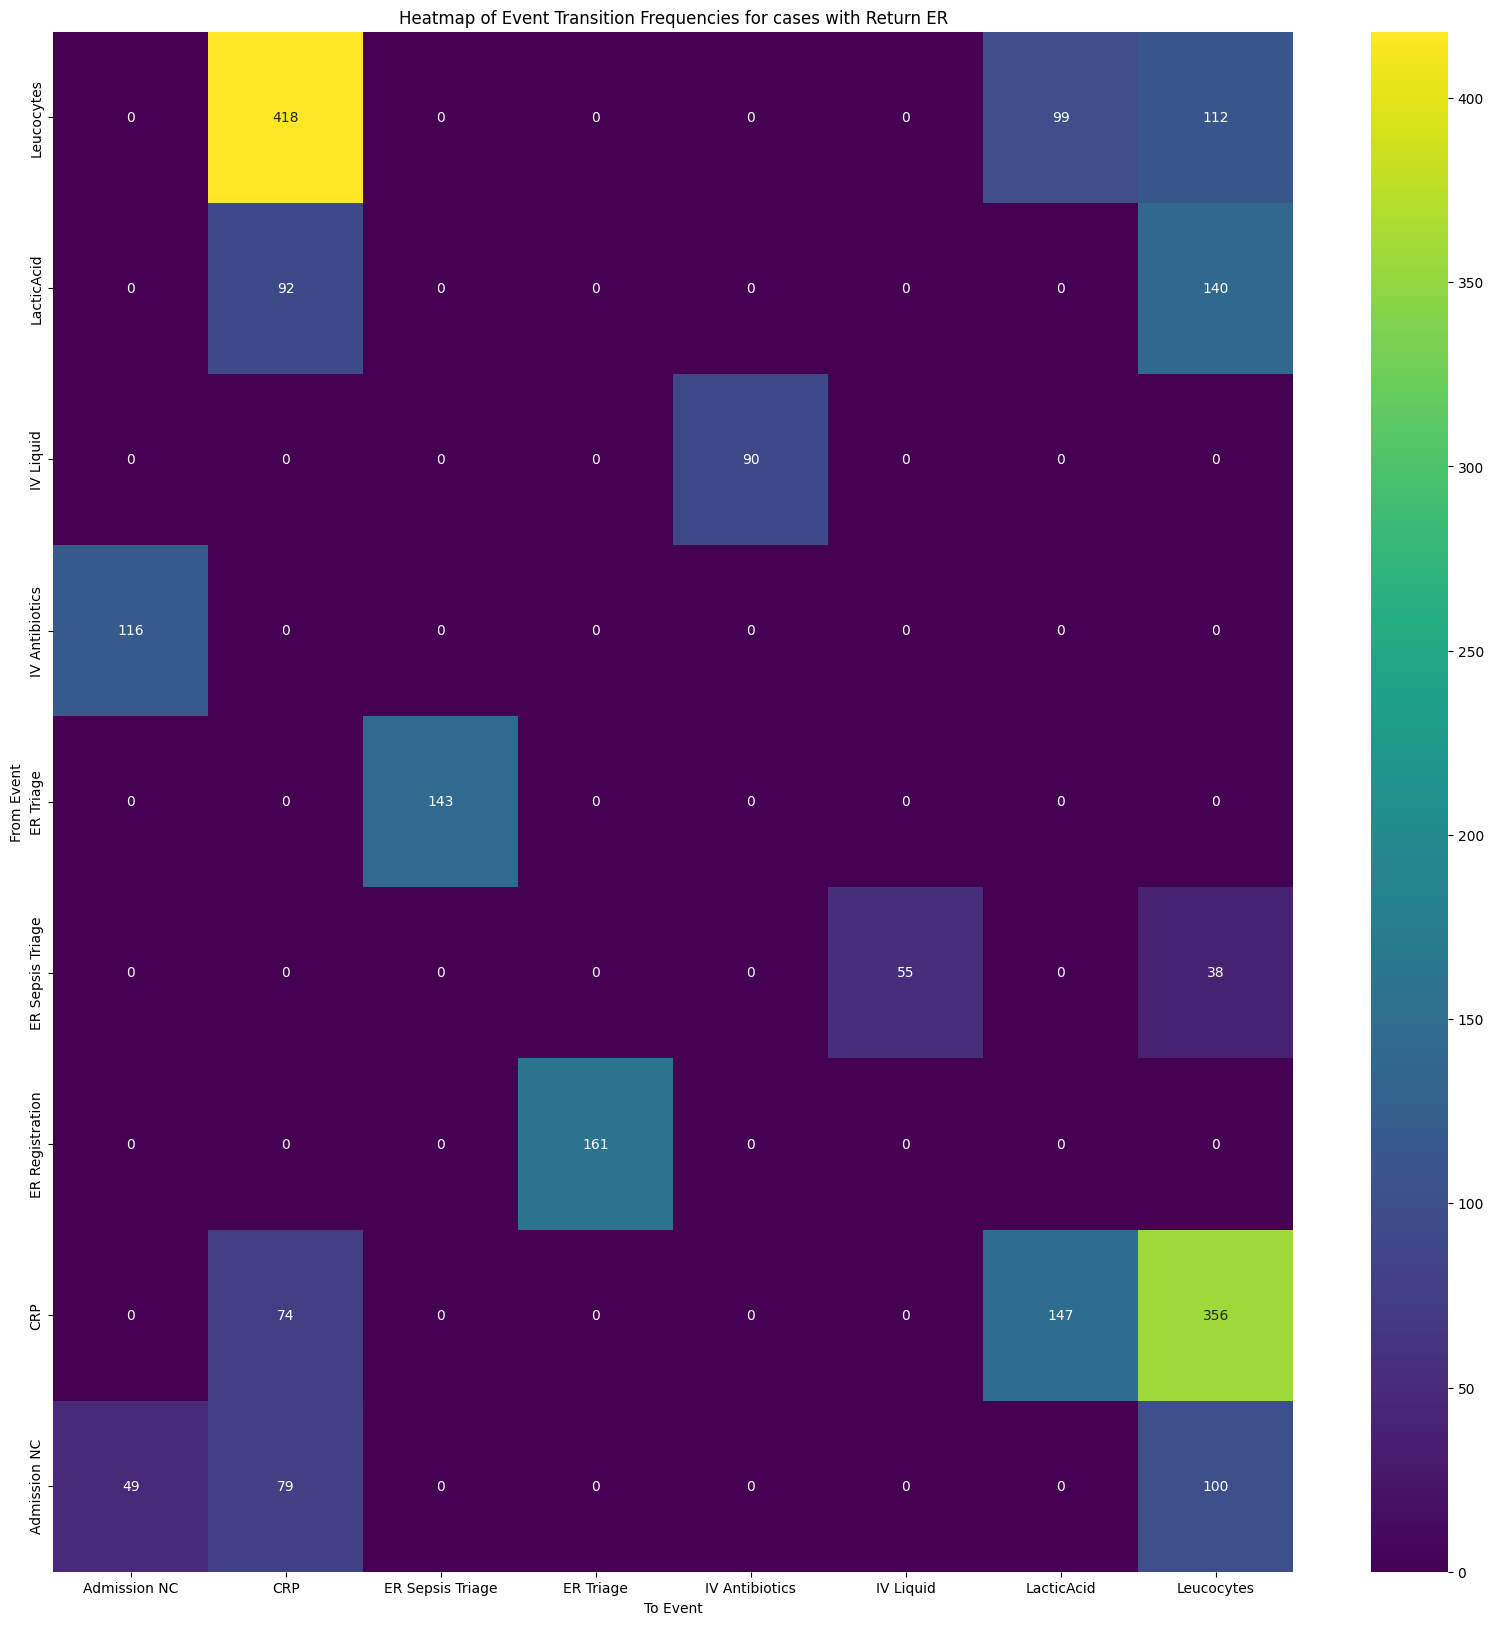

In [ ]:
# 2.2 - Heatmap for log_with_return_er
# Extract the DFG
dfg, start_activities, end_activities = pm4py.discover_dfg(log_with_return_er)
print(dfg)

# 2.2.1 - Set a threshold
threshold = 35

# 2.2.2 - Filter the dictionary to only include items with values above the threshold
filtered_dfg = {key: value for key, value in dfg.items() if value > threshold}

# 2.2.3 - Initialize an empty dictionary to be converted to DataFrame
transition_matrix = {}
for (from_event, to_event), frequency in filtered_dfg.items():
    if from_event not in transition_matrix:
        transition_matrix[from_event] = {}
    transition_matrix[from_event][to_event] = frequency

# 2.2.4 - Create DataFrame
df_matrix = pd.DataFrame(transition_matrix).fillna(0).astype(int).T  # Transpose for correct orientation

columns_to_remove = ['Return ER', 'Release A']
df_matrix = df_matrix.drop(columns=columns_to_remove, errors='ignore')
df_matrix = df_matrix.drop(index=columns_to_remove, errors='ignore')


df_matrix = df_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1, ascending=True)
# 2.2.5 - Display the resulting matrix
#print(df_matrix)

# 2.2.6 - Create a mask for values below the threshold
mask = df_matrix < 0

# 2.2.7 - Generate the heatmap
plt.figure(figsize=(20, 20))  # Size may need adjustment based on the actual size of the matrix
sns.heatmap(df_matrix, annot=True, fmt="d",vmax=418, cmap="viridis")
plt.title('Heatmap of Event Transition Frequencies for cases with Return ER')
plt.xlabel('To Event')
plt.ylabel('From Event')
plt.show()

{('Admission IC', 'Admission IC'): 1, ('Admission IC', 'Admission NC'): 3, ('Admission IC', 'CRP'): 15, ('Admission IC', 'ER Sepsis Triage'): 1, ('Admission IC', 'LacticAcid'): 22, ('Admission IC', 'Leucocytes'): 23, ('Admission NC', 'Admission IC'): 10, ('Admission NC', 'Admission NC'): 105, ('Admission NC', 'CRP'): 234, ('Admission NC', 'ER Sepsis Triage'): 5, ('Admission NC', 'IV Antibiotics'): 1, ('Admission NC', 'IV Liquid'): 13, ('Admission NC', 'LacticAcid'): 19, ('Admission NC', 'Leucocytes'): 244, ('Admission NC', 'Release A'): 72, ('Admission NC', 'Release B'): 17, ('Admission NC', 'Release C'): 4, ('Admission NC', 'Release D'): 1, ('CRP', 'Admission IC'): 11, ('CRP', 'Admission NC'): 125, ('CRP', 'CRP'): 187, ('CRP', 'ER Registration'): 14, ('CRP', 'ER Sepsis Triage'): 25, ('CRP', 'ER Triage'): 12, ('CRP', 'IV Antibiotics'): 56, ('CRP', 'IV Liquid'): 77, ('CRP', 'LacticAcid'): 383, ('CRP', 'Leucocytes'): 872, ('CRP', 'Release A'): 184, ('CRP', 'Release B'): 19, ('CRP', 'Rele

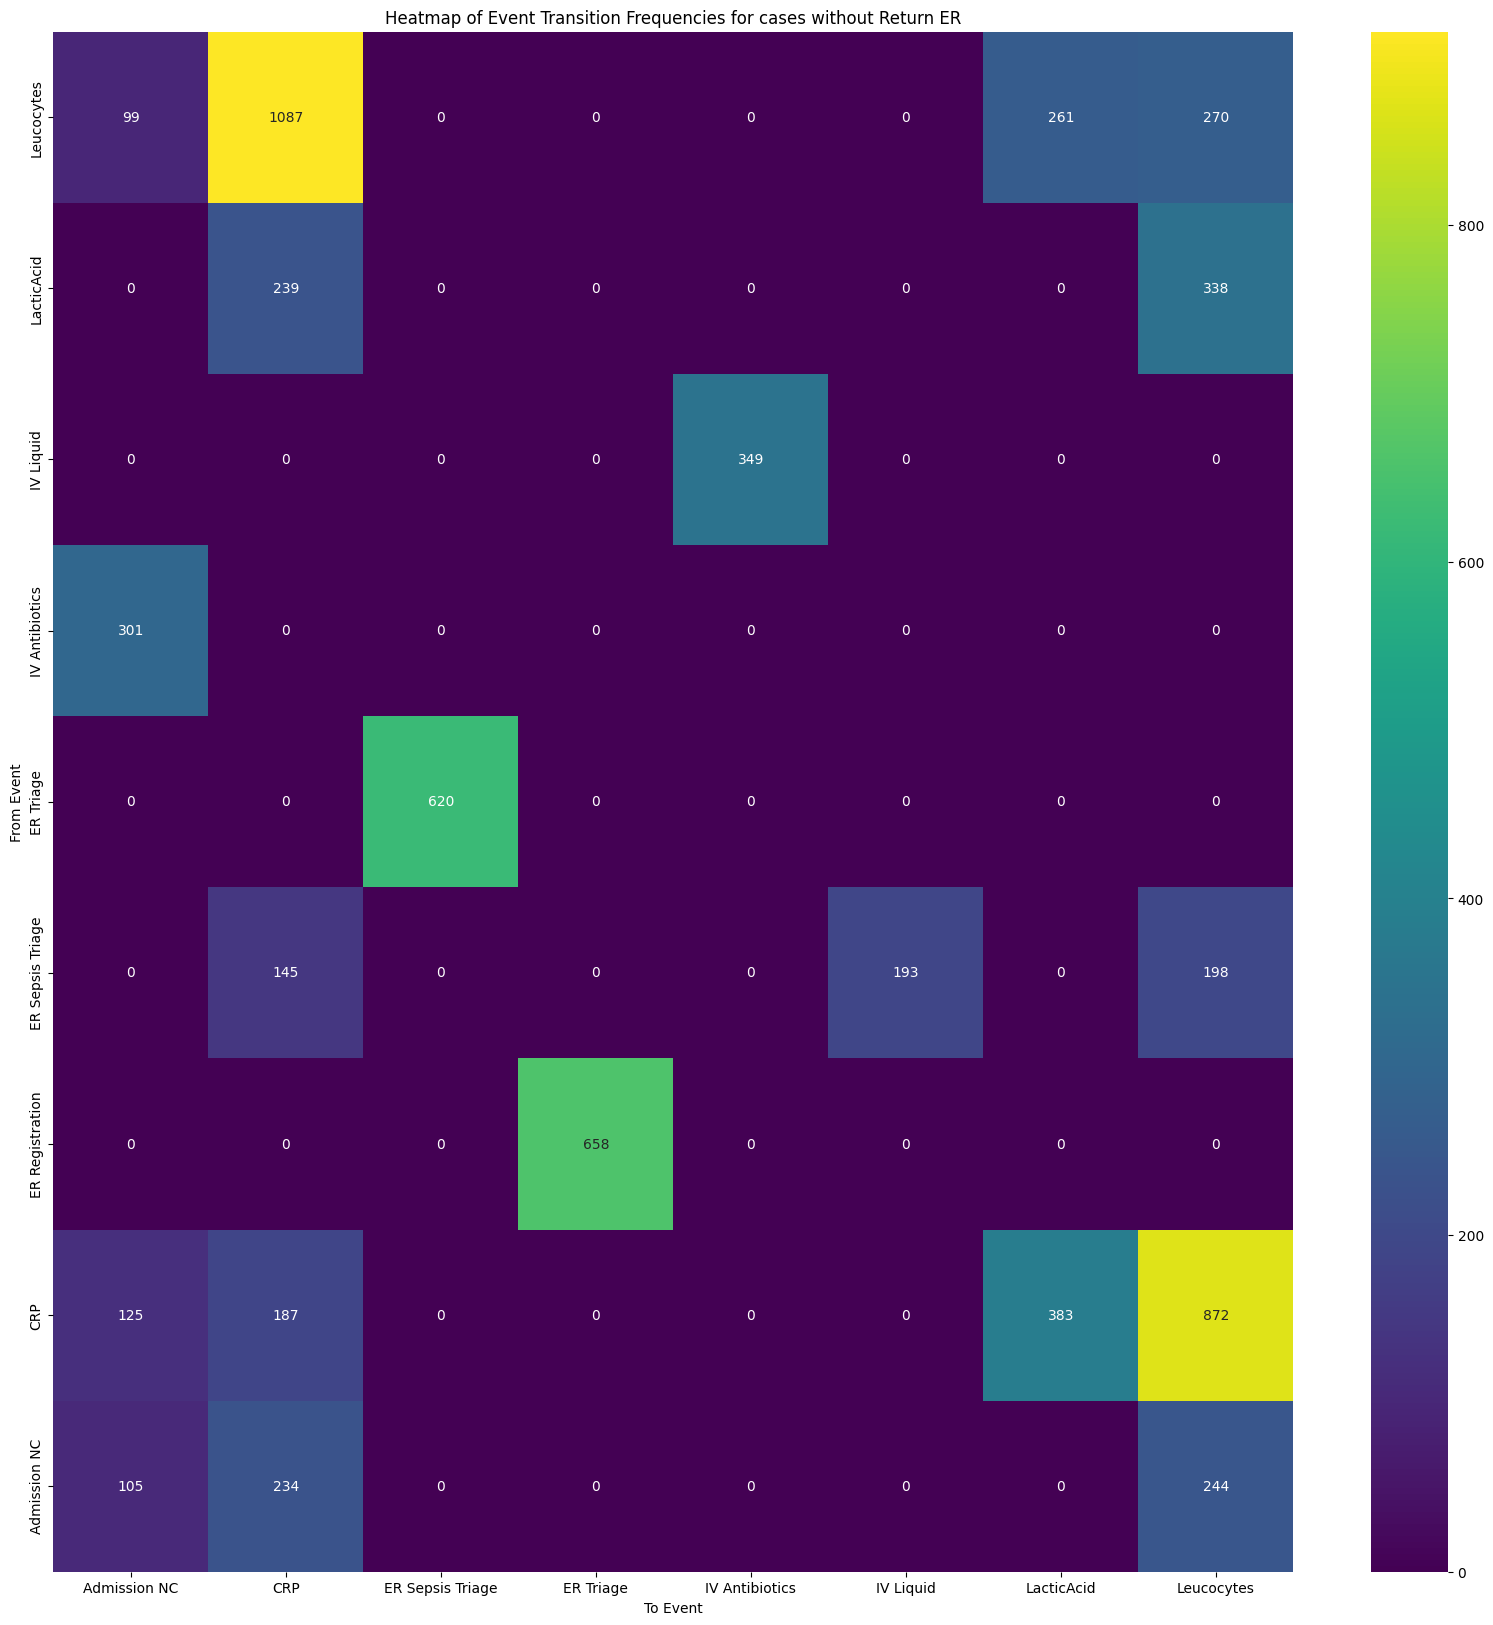

In [ ]:
# 2.3 - Heatmap for log_without_return_er

# 2.3.1 - Extract the DFG
dfg, start_activities, end_activities = pm4py.discover_dfg(log_without_return_er)
print(dfg)

# 2.3.2 - Set a threshold
threshold = 95


# 2.3.3 -  Filter the dictionary to only include items with values above the threshold
filtered_dfg = {key: value for key, value in dfg.items() if value > threshold}

# 2.3.4 - Initialize an empty dictionary to be converted to DataFrame
transition_matrix = {}
for (from_event, to_event), frequency in filtered_dfg.items():
    if from_event not in transition_matrix:
        transition_matrix[from_event] = {}
    transition_matrix[from_event][to_event] = frequency

# 2.3.5 - Create DataFrame
df_matrix = pd.DataFrame(transition_matrix).fillna(0).astype(int).T  # Transpose for correct orientation

columns_to_remove = ['Return ER', 'Release A']
df_matrix = df_matrix.drop(columns=columns_to_remove, errors='ignore')
df_matrix = df_matrix.drop(index=columns_to_remove, errors='ignore')


df_matrix = df_matrix.sort_index(axis=0, ascending=False).sort_index(axis=1, ascending=True)
# 2.3.6 - Display the resulting matrix
#print(df_matrix)

# 2.3.7 - Create a mask for values below the threshold
mask = df_matrix < 0

# 2.3.8 - Generate the heatmap
plt.figure(figsize=(20, 20))  # Size may need adjustment based on the actual size of the matrix
sns.heatmap(df_matrix,annot=True, fmt="d", vmax=915, cmap="viridis")
plt.title('Heatmap of Event Transition Frequencies for cases without Return ER')
plt.xlabel('To Event')
plt.ylabel('From Event')
plt.show()

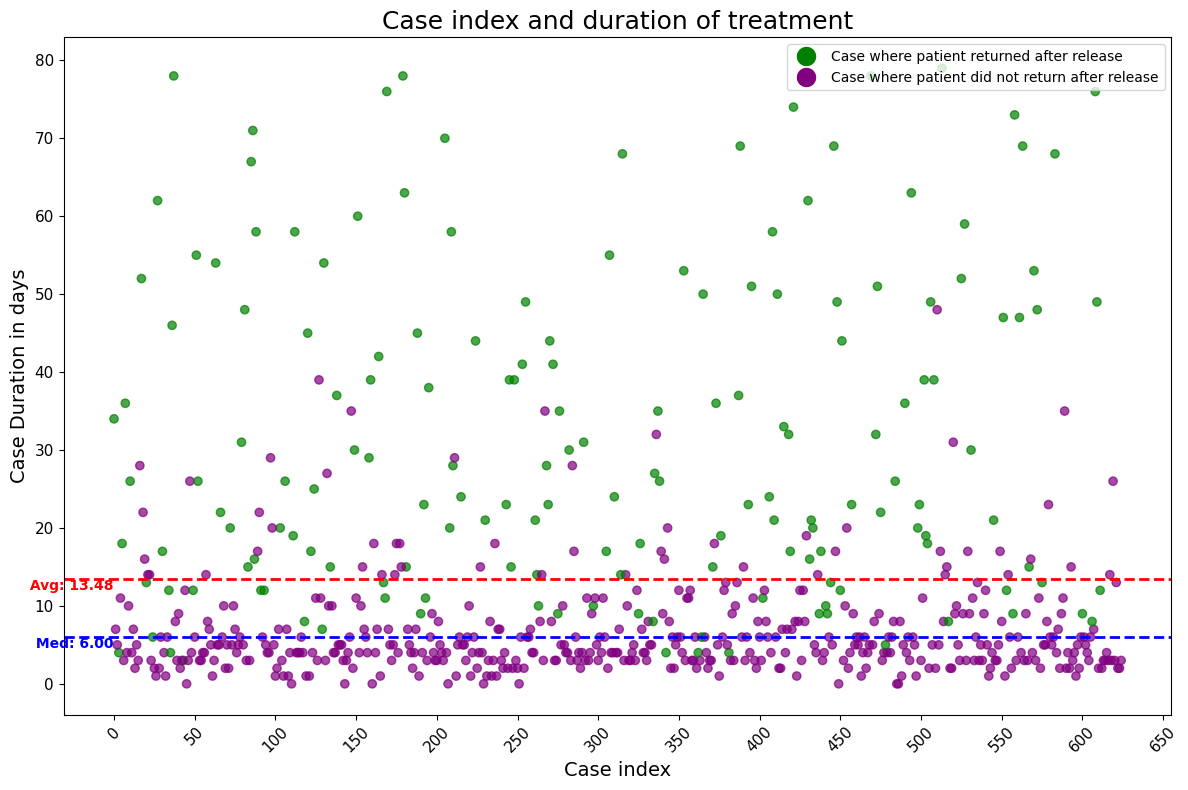

In [ ]:
# 2.4  - Duration of treatment plot


# Mark the first event of each case
# filtered_log['is_first_event_in_case'] = filtered_log.groupby('case:concept:name').cumcount() == 0

# # Mark the last event of each case
# last_event_values = ['Release A', 'Release B', 'Release E', 'Release C', 'Release D', 'Return ER']
# filtered_log['is_last_event_temp'] = filtered_log['concept:name'].isin(last_event_values)
# filtered_log['is_last_event_in_case'] = filtered_log['is_last_event_temp'] & ~filtered_log['is_last_event_temp'].shift(-1, fill_value=False)
# filtered_log['is_last_event_in_case'] = filtered_log['is_last_event_in_case'].astype(bool)
# filtered_log.drop(columns=['is_last_event_temp'], inplace=True)

# 2.4.1 - Add duration columns
filtered_log['duration_in_days_of_case'] = pd.NaT
filtered_log['duration_in_minutes_of_case'] = pd.NaT

for case_name, group in filtered_log.groupby('case:concept:name'):
    first_index = group[group['is_first_event_in_case']].index
    last_index = group[group['is_last_event_in_case']].index

    if not first_index.empty and not last_index.empty:
        first_index = first_index[0]
        last_index = last_index[-1]

        duration_in_minutes_of_case = (group.loc[last_index, 'start_timestamp'] - group.loc[first_index, 'start_timestamp']).total_seconds() / 60

        filtered_log.loc[first_index, 'duration_in_days_of_case'] = int(duration_in_minutes_of_case / (24 * 60))
        filtered_log.loc[first_index, 'duration_in_minutes_of_case'] = int(duration_in_minutes_of_case)

# 2.4.2 - Create a column to indicate if a case returned after release
filtered_log['is_returned_after_release'] = filtered_log['concept:name'].eq('Return ER').groupby(filtered_log['case:concept:name']).transform('max')

# 2.4.3 - Calculate duration per case
case_durations = filtered_log.groupby('case:concept:name')['duration_in_days_of_case'].first().dropna().reset_index()

# 2.4.4 - Sort case durations by duration
case_durations.sort_values(by='duration_in_days_of_case', inplace=True)

# 2.4.5 - Define colors based on is_returned_after_release
colors = np.where(filtered_log.groupby('case:concept:name')['is_returned_after_release'].first().loc[case_durations['case:concept:name']], 'green', 'purple')

# 2.4.6 - Plotting the case durations
plt.figure(figsize=(12, 8))

# 2.4.7 - Create scatter plot with legend
plt.scatter(case_durations.index, case_durations['duration_in_days_of_case'], c=colors, alpha=0.7, label='is_returned_after_release')

plt.xlabel('Case index', fontsize=14)
plt.ylabel('Case Duration in days', fontsize=14)
plt.title('Case index and duration of treatment', fontsize=18)

# 2.4.8 - Add average, median lines
mean_duration = case_durations['duration_in_days_of_case'].mean()
median_duration = case_durations['duration_in_days_of_case'].median()
percentile_85_duration = np.percentile(case_durations['duration_in_days_of_case'], 85)

plt.axhline(y=mean_duration, color='red', linestyle='--', linewidth=2, label=f'Average Duration: {mean_duration:.2f} days')
plt.axhline(y=median_duration, color='blue', linestyle='--', linewidth=2, label=f'Median Duration: {median_duration:.2f} days')


# 2.4.9 -Annotate average, medianvalues on the left side, Create custom legend with appropriate labels
plt.text(-0.1, mean_duration, f' Avg: {mean_duration:.2f}', va='top', ha='right', fontsize=10, weight='bold', color='red')
plt.text(-0.1, median_duration, f' Med: {median_duration:.2f}', va='top', ha='right', fontsize=10, weight='bold', color='blue')



legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Case where patient returned after release'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Case where patient did not return after release')
]
plt.legend(handles=legend_handles, loc='upper right', markerscale=1.5)


tick_positions_cases = np.arange(0, len(case_durations) + 50, 50)
plt.xticks(tick_positions_cases, rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

With 'Return ER': Number of events: 3189
Number of cases: 167
Without 'Return ER': Number of events: 7248
Number of cases: 458


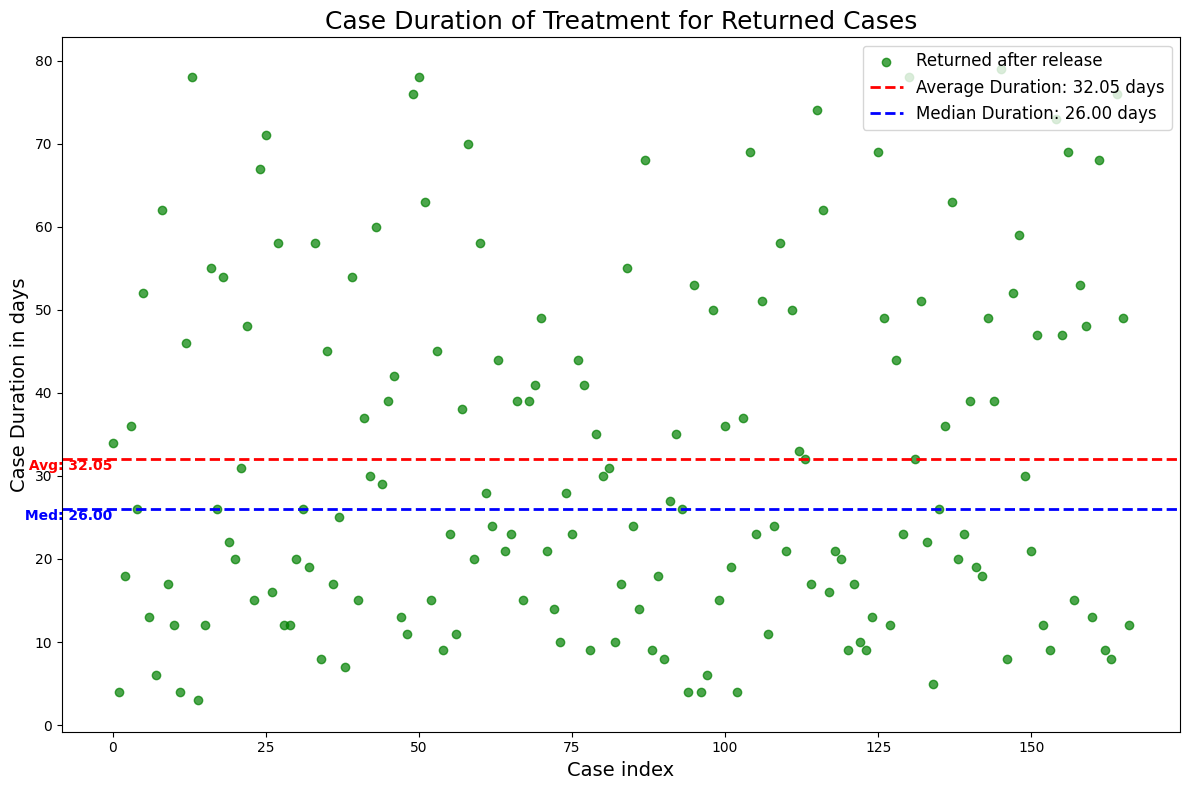

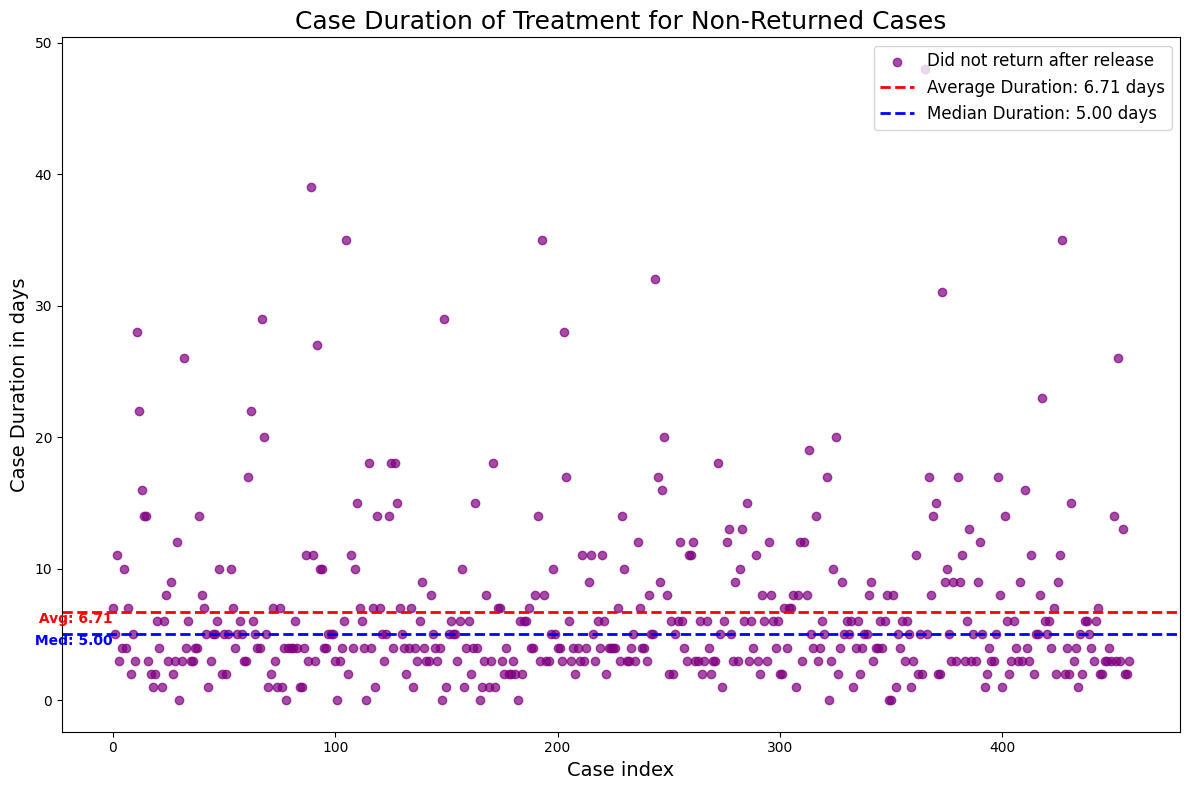

In [ ]:
# 2.5 - Divide previous plot to two charts - one for patients who returned and one who didin't

# 2.5.1 - Identify cases that contain the 'Return ER' event
cases_with_return_er = filtered_log[filtered_log['concept:name'] == 'Return ER']['case:concept:name'].unique()
cases_with_return_er = set(cases_with_return_er)

# 2.5.2 - Split the event log into two groups: cases with 'Return ER' and cases without 'Return ER'
log_with_return_er = filtered_log[filtered_log['case:concept:name'].isin(cases_with_return_er)].copy()
log_without_return_er = filtered_log[~filtered_log['case:concept:name'].isin(cases_with_return_er)].copy()

# 2.5.3 - Summary statistics for the two groups
num_events_with_return_er = len(log_with_return_er)
num_cases_with_return_er = len(log_with_return_er['case:concept:name'].unique())
num_events_without_return_er = len(log_without_return_er)
num_cases_without_return_er = len(log_without_return_er['case:concept:name'].unique())

print("With 'Return ER': Number of events: {}\nNumber of cases: {}".format(num_events_with_return_er, num_cases_with_return_er))
print("Without 'Return ER': Number of events: {}\nNumber of cases: {}".format(num_events_without_return_er, num_cases_without_return_er))

# 2.5.4 - Calculate duration per case
filtered_log['duration_in_days_of_case'] = (filtered_log.groupby('case:concept:name')['start_timestamp'].transform('max') -
                                             filtered_log.groupby('case:concept:name')['start_timestamp'].transform('min')).dt.days


# 2.5.5 - Group cases into returned and non-returned and Calculate duration per case for returned and non-returned cases
returned_cases = filtered_log[filtered_log['case:concept:name'].isin(cases_with_return_er)]
non_returned_cases = filtered_log[~filtered_log['case:concept:name'].isin(cases_with_return_er)]


case_durations_returned = returned_cases.groupby('case:concept:name')['duration_in_days_of_case'].first().dropna().reset_index()
case_durations_non_returned = non_returned_cases.groupby('case:concept:name')['duration_in_days_of_case'].first().dropna().reset_index()

# 2.5.6 - Sort case durations
case_durations_returned.sort_values(by='duration_in_days_of_case', inplace=True)
case_durations_non_returned.sort_values(by='duration_in_days_of_case', inplace=True)

# 2.5.7 - Calculate statistics for returned cases and Calculate statistics for non-returned cases
mean_returned = case_durations_returned['duration_in_days_of_case'].mean()
median_returned = case_durations_returned['duration_in_days_of_case'].median()


mean_non_returned = case_durations_non_returned['duration_in_days_of_case'].mean()
median_non_returned = case_durations_non_returned['duration_in_days_of_case'].median()



# 2.5.8 - Plot for returned cases
plt.figure(figsize=(12, 8))
plt.scatter(case_durations_returned.index, case_durations_returned['duration_in_days_of_case'], color='green', alpha=0.7, label='Returned after release')
plt.xlabel('Case index', fontsize=14)
plt.ylabel('Case Duration in days', fontsize=14)
plt.title('Case Duration of Treatment for Returned Cases', fontsize=18)
plt.axhline(y=mean_returned, color='red', linestyle='--', linewidth=2, label=f'Average Duration: {mean_returned:.2f} days')
plt.axhline(y=median_returned, color='blue', linestyle='--', linewidth=2, label=f'Median Duration: {median_returned:.2f} days')

# 2.5.9 - Annotate average, medianvalues on the left side and Plot for non-returned cases and annotate average, medianvalues on the left side
plt.text(-0.1, mean_returned, f' Avg: {mean_returned :.2f}', va='top', ha='right', fontsize=10, weight='bold', color='red')
plt.text(-0.1, median_returned, f' Med: {median_returned:.2f}', va='top', ha='right', fontsize=10, weight='bold', color='blue')

plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(case_durations_non_returned.index, case_durations_non_returned['duration_in_days_of_case'], color='purple', alpha=0.7, label='Did not return after release')
plt.xlabel('Case index', fontsize=14)
plt.ylabel('Case Duration in days', fontsize=14)
plt.title('Case Duration of Treatment for Non-Returned Cases', fontsize=18)
plt.axhline(y=mean_non_returned, color='red', linestyle='--', linewidth=2, label=f'Average Duration: {mean_non_returned:.2f} days')
plt.axhline(y=median_non_returned, color='blue', linestyle='--', linewidth=2, label=f'Median Duration: {median_non_returned:.2f} days')

plt.text(-0.1, mean_non_returned, f' Avg: {mean_non_returned :.2f}', va='top', ha='right', fontsize=10, weight='bold', color='red')
plt.text(-0.1, median_non_returned, f' Med: {median_non_returned:.2f}', va='top', ha='right', fontsize=10, weight='bold', color='blue')
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


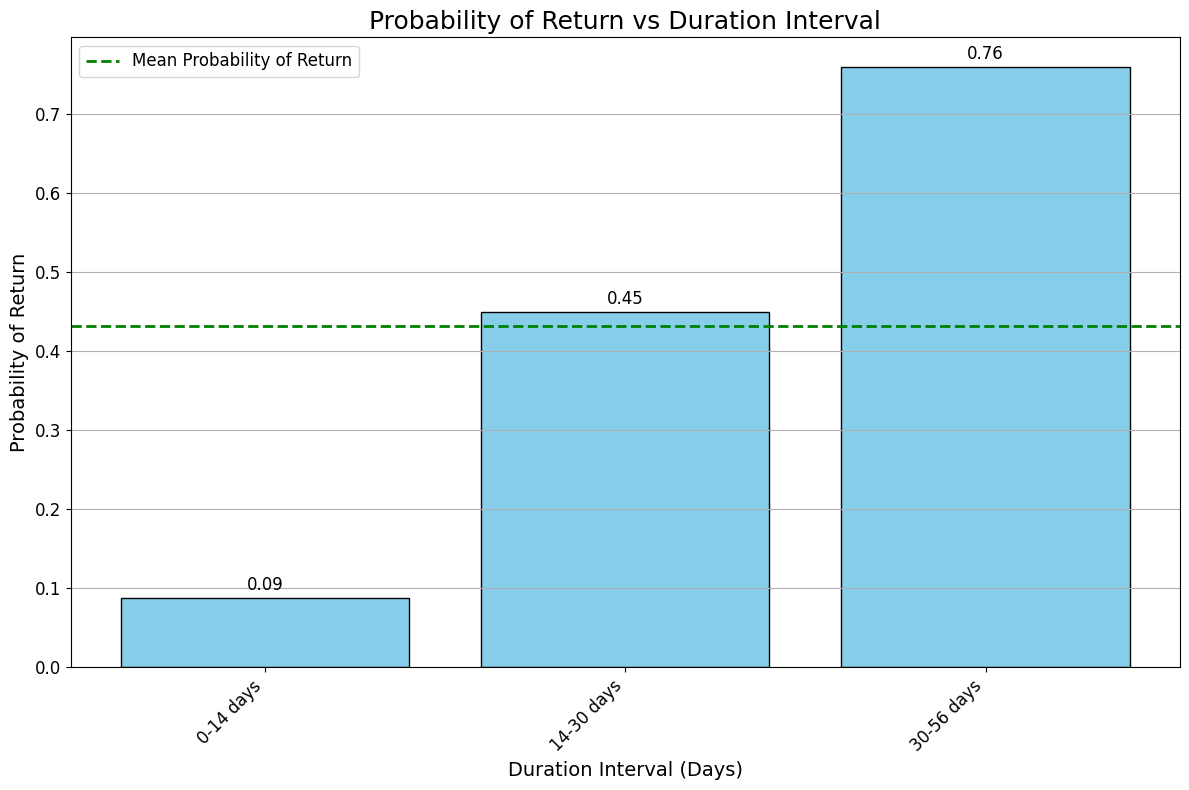

In [ ]:
# 2.6 - plotting probability of return when duration of stay in hostpital increases

# 2.6.1 - Define duration intervals (modify these as needed)
duration_intervals = [(0, 14), (14, 30), (30, 56)]  # Days (0-7, 7-14, 14-30, 30+)

# 2.6.2 - Function to assign duration interval based on days
def get_duration_interval(days):
    for start, end in duration_intervals:
        if start <= days < end:
            return f"{start}-{end} days"




# 2.6.3 - Calculate duration per case
filtered_log['duration_in_days_of_case'] = (filtered_log.groupby('case:concept:name')['start_timestamp'].transform('max') -
                                             filtered_log.groupby('case:concept:name')['start_timestamp'].transform('min')).dt.days

# 2.6.4 - Create a new column for duration intervals
filtered_log['duration_interval'] = filtered_log['duration_in_days_of_case'].apply(get_duration_interval)

# 2.6.5 - Mark cases where there's a return ER event and Group by duration interval and calculate probability of return
filtered_log['is_returned_after_release'] = filtered_log['concept:name'].eq('Return ER').groupby(filtered_log['case:concept:name']).transform('max')
duration_prob_return = filtered_log.groupby('duration_interval')['is_returned_after_release'].mean().reset_index()

# 2.6.6 - Sort duration intervals by converting them to numerical values
duration_prob_return['sort_order'] = duration_prob_return['duration_interval'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x.split('+')[0]))

# 2.6.7 - Sort by the numerical order
duration_prob_return = duration_prob_return.sort_values(by='sort_order').reset_index(drop=True)

# 2.6.8 - Plotting the probability of return vs duration interval as a column (bar) plot
plt.figure(figsize=(12, 8))

bars = plt.bar(duration_prob_return['duration_interval'], duration_prob_return['is_returned_after_release'],
               color='skyblue', edgecolor='black', width=0.8)

plt.xlabel('Duration Interval (Days)', fontsize=14)
plt.ylabel('Probability of Return', fontsize=14)
plt.title('Probability of Return vs Duration Interval', fontsize=18)

plt.axhline(y=duration_prob_return['is_returned_after_release'].mean(), color='g', linestyle='--', linewidth=2, label='Mean Probability of Return')

# 2.6.9 - Add annotations
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.legend(fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


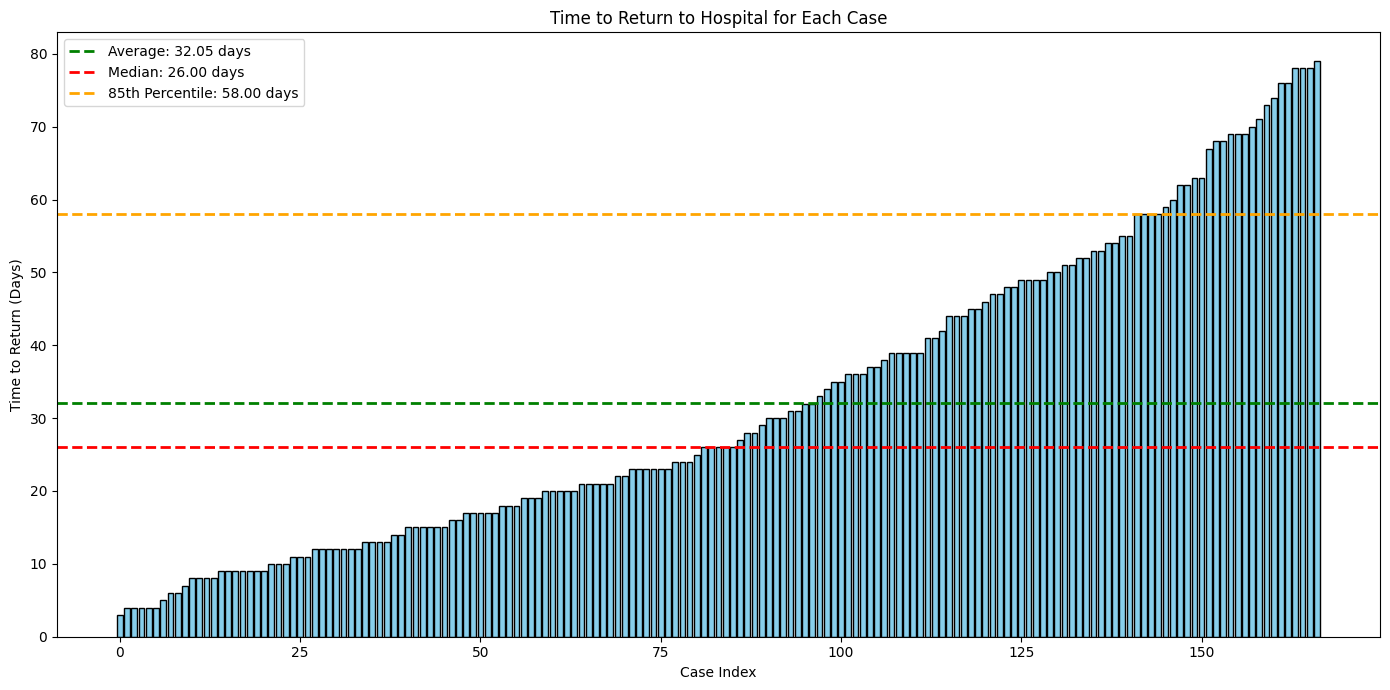

In [ ]:
# 2.7 - Time to return to hospital for each case -  Duration of stay for patients who return distributed per case index, different representation

return_times_list = []

# 2.7.1 - Calculate time to return for each case
for case_name, group in filtered_log.groupby('case:concept:name'):
    if 'Return ER' in group['concept:name'].values:
        start_time = group['start_timestamp'].min()
        return_time = group[group['concept:name'] == 'Return ER']['start_timestamp'].min()
        time_to_return = (return_time - start_time).days
        return_times_list.append({
            'case:concept:name': case_name,
            'time_to_return_in_days': time_to_return
        })

# 2.7.2 - Convert list to DataFrame
return_times_df = pd.DataFrame(return_times_list)

# 2.7.3 - Sorting DataFrame by time to return
return_times_df.sort_values(by='time_to_return_in_days', inplace=True)

# 2.7.4 - Reset index
return_times_df.reset_index(drop=True, inplace=True)

# 2.7.5 - Plotting
plt.figure(figsize=(14, 7))
plt.bar(return_times_df.index, return_times_df['time_to_return_in_days'], color='skyblue', edgecolor='black')

# 2.7.6 - Add labels and title
plt.xlabel('Case Index')
plt.ylabel('Time to Return (Days)')
plt.title('Time to Return to Hospital for Each Case')

# 2.7.7 - Add average, median, and 85th percentile lines
mean_return_time = return_times_df['time_to_return_in_days'].mean()
median_return_time = return_times_df['time_to_return_in_days'].median()
percentile_85_return_time = return_times_df['time_to_return_in_days'].quantile(0.85)

plt.axhline(mean_return_time, color='green', linestyle='--', linewidth=2, label=f'Average: {mean_return_time:.2f} days')
plt.axhline(median_return_time, color='red', linestyle='--', linewidth=2, label=f'Median: {median_return_time:.2f} days')
plt.axhline(percentile_85_return_time, color='orange', linestyle='--', linewidth=2, label=f'85th Percentile: {percentile_85_return_time:.2f} days')

plt.legend()

plt.tight_layout()
plt.show()

First 5 'concept:name' entries that are counted for log_with_return_er:
['CRP', 'LacticAcid', 'Leucocytes']
First 5 'concept:name' entries that are counted for log_without_return_er:
['CRP', 'LacticAcid', 'Leucocytes']


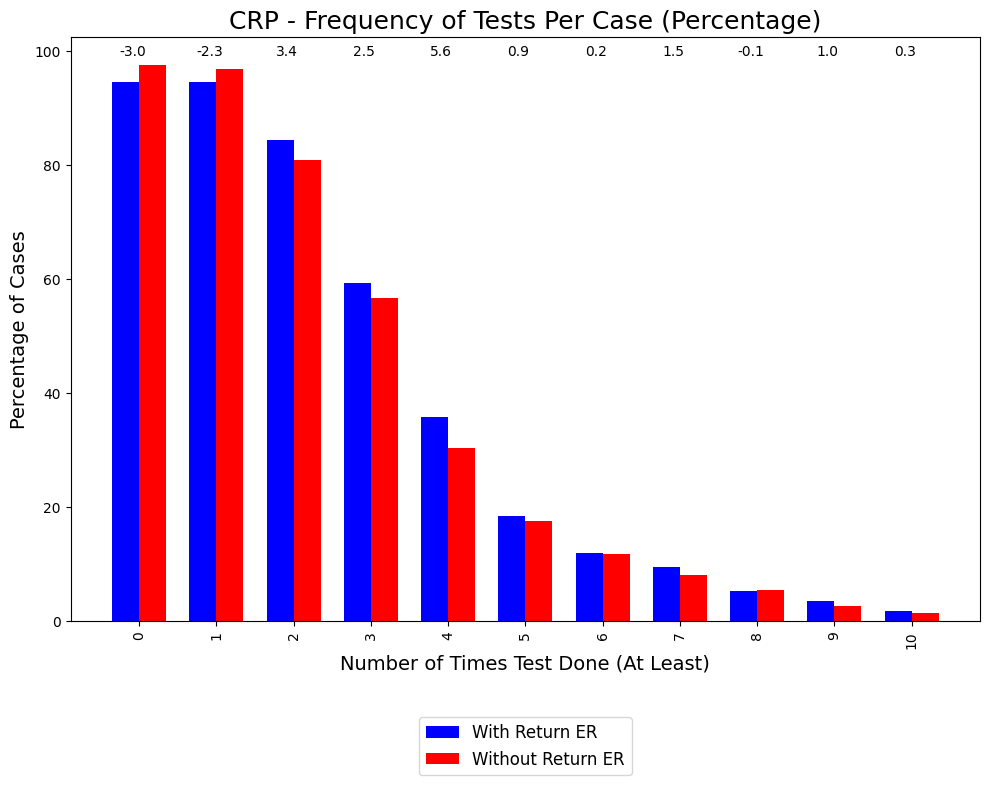

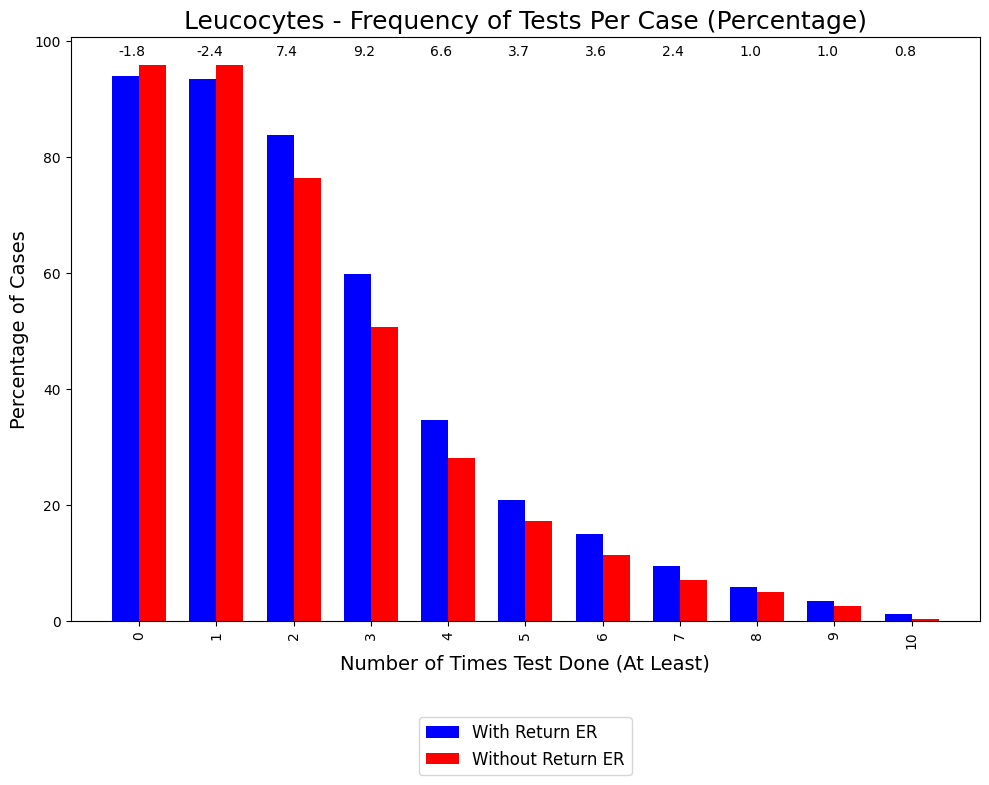

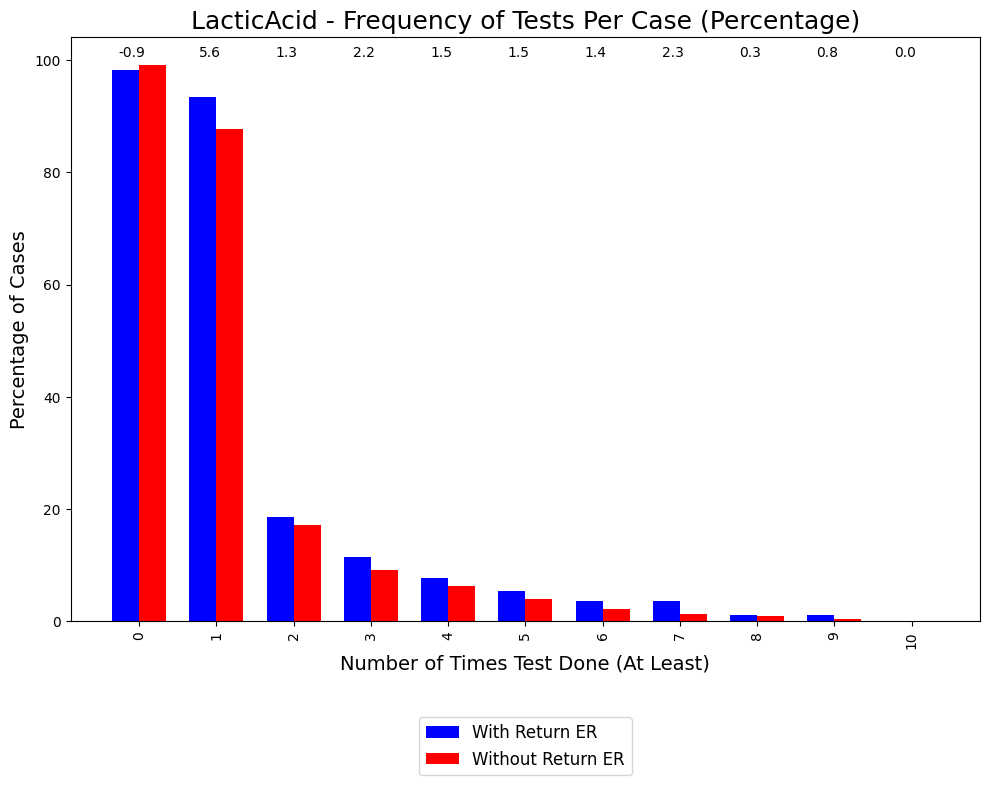

In [ ]:
# 2.8 - Frequency of important tests - CRP, Leucocytes, LacticAcid

# 2.8.1 - Function to count diagnostics per case
def count_diagnostics_per_case(log, diagnostics):
    counts_per_case = log[log['concept:name'].isin(diagnostics)].groupby(['case:concept:name', 'concept:name']).size().unstack(fill_value=0)
    return counts_per_case

# 2.8.2 - Function to summarize counts of diagnostics
def summarize_counts(counts_per_case, diagnostic):
    counts = counts_per_case[diagnostic].value_counts().sort_index()
    # Ensure 0 count is included
    if 0 not in counts:
        counts = pd.concat([pd.Series({0: (counts_per_case.shape[0] - counts.sum())}), counts])
    return counts

# 2.8.3 - Function to convert counts to percentages
def convert_to_percentage(counts, total_cases):
    return (counts / total_cases) * 100

# 2.8.4 - Function to convert counts to cumulative "at least" counts, limited to max_value
def convert_to_cumulative_counts(counts, max_value):
    all_indices = pd.Series(0, index=range(max_value + 1))
    all_indices.update(counts)
    cumulative_counts = all_indices[::-1].cumsum()[::-1]
    return cumulative_counts

# 2.8.5 - Function to plot grouped bar plots with difference annotations
def plot_grouped_bars(counts_with_return, counts_without_return, diagnostic, max_value):
    fig, ax = plt.subplots(figsize=(10, 8))  # Larger figure size

    # Combine both series to ensure the same indices (frequency values)
    combined = pd.DataFrame({
        'With Return ER': counts_with_return,
        'Without Return ER': counts_without_return
    }).fillna(0)

    # Limit to maximum value of 20
    combined = combined[combined.index <= max_value]

    # Calculate differences
    differences = combined['With Return ER'] - combined['Without Return ER']

    # 2.8.6 - Create a bar plot
    bar_width = 0.35
    index = np.arange(combined.shape[0])

    bars1 = ax.bar(index, combined['With Return ER'], bar_width, label='With Return ER', color='blue')
    bars2 = ax.bar(index + bar_width, combined['Without Return ER'], bar_width, label='Without Return ER', color='red')

    # Add difference annotations
    for i, diff in enumerate(differences):
        ax.annotate(f'{diff:.1f}', xy=(index[i] + bar_width / 4, max(combined.max()) + 1),
                    ha='center', va='bottom', fontsize=10, color='black')

    ax.set_title(f'{diagnostic} - Frequency of Tests Per Case (Percentage)', fontsize=18)
    ax.set_xlabel('Number of Times Test Done (At Least)', fontsize=14)
    ax.set_ylabel('Percentage of Cases', fontsize=14)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(combined.index.astype(int), fontsize=10, rotation=90)  # Rotate x-axis labels

    # Adjust legend position
    ax.legend(fontsize=12, bbox_to_anchor=(0.5, -0.15), loc='upper center')  # Place legend below the plot

    plt.tight_layout()  # Ensure tight layout
    plt.show()

# 2.8.6 - Define diagnostics of interest
diagnostics = ['CRP', 'Leucocytes', 'LacticAcid']

# Assuming log_with_return_er and log_without_return_er are defined
# Split the event log into two groups: cases with 'Return ER' and cases without 'Return ER'
total_cases_with_return = len(log_with_return_er['case:concept:name'].unique())
total_cases_without_return = len(log_without_return_er['case:concept:name'].unique())

# 2.8.7 - Count diagnostics per case for both groups
counts_with_return_er = count_diagnostics_per_case(log_with_return_er, diagnostics)
counts_without_return_er = count_diagnostics_per_case(log_without_return_er, diagnostics)

# Print the first 5 'concept:name' entries that are counted
print("First 5 'concept:name' entries that are counted for log_with_return_er:")
print(counts_with_return_er.columns[:5].tolist())

print("First 5 'concept:name' entries that are counted for log_without_return_er:")
print(counts_without_return_er.columns[:5].tolist())

# 2.8.8 - Sort 'Leucocytes' counts in descending order and print top 5
sorted_leucocytes_with_return = counts_with_return_er['Leucocytes'].sort_values(ascending=False).head(5)
sorted_leucocytes_without_return = counts_without_return_er['Leucocytes'].sort_values(ascending=False).head(5)

# 2.8.9 - Convert to percentage and plot grouped bar plots for each diagnostic
max_value = 10  # Maximum value for x-axis
for diagnostic in diagnostics:
    counts_with_return = summarize_counts(counts_with_return_er, diagnostic)
    counts_without_return = summarize_counts(counts_without_return_er, diagnostic)

    # Convert counts to cumulative "at least" counts, limited to max_value
    cumulative_counts_with_return = convert_to_cumulative_counts(counts_with_return, max_value)
    cumulative_counts_without_return = convert_to_cumulative_counts(counts_without_return, max_value)

    # Convert counts to percentages
    percentage_counts_with_return = convert_to_percentage(cumulative_counts_with_return, total_cases_with_return)
    percentage_counts_without_return = convert_to_percentage(cumulative_counts_without_return, total_cases_without_return)

    plot_grouped_bars(percentage_counts_with_return, percentage_counts_without_return, diagnostic, max_value)


Filtered log:  458
Age 
 0        85.0
49       75.0
202      85.0
217      70.0
228      60.0
         ... 
15147    90.0
15157    75.0
15169    85.0
15182    85.0
15200    70.0
Name: Age, Length: 458, dtype: float64
Age len 
 458


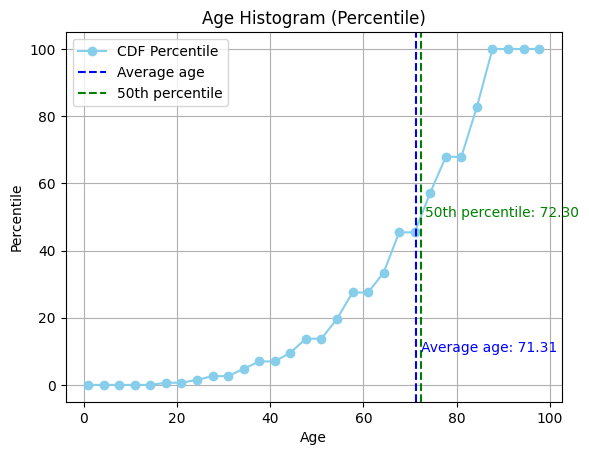

In [ ]:
# Age for without return ER
print('Filtered log: ', len(log_without_return_er['case:concept:name'].unique()))
age_column = log_without_return_er[log_without_return_er['Age'] > 0]['Age']
print('Age \n', age_column)
print('Age len \n', len(age_column))

age_column = log_without_return_er[(log_without_return_er['Age'] >= 1) & (log_without_return_er['Age'] <= 100)]['Age']

# Calculate histogram with 30 bins
hist, bins = np.histogram(age_column, bins=30, range=(1, 101), density=True)

# Calculate cumulative distribution function (CDF)
cdf = np.cumsum(hist)

# Normalize CDF to percentiles
cdf_percentile = (cdf / cdf[-1]) * 100

# Plot histogram as percentiles
plt.plot(bins[:-1], cdf_percentile, color='skyblue', marker='o', linestyle='-', label='CDF Percentile')
plt.xlabel('Age')
plt.ylabel('Percentile')
plt.title('Age Histogram (Percentile)')

# Calculate and plot average age
average_age = age_column.mean()
plt.axvline(x=average_age, color='blue', linestyle='--', label='Average age')
plt.text(average_age + 1, 10, f'Average age: {average_age:.2f}', color='blue')

# Find the value corresponding to 50th
percentile_50_value = np.interp(50, cdf_percentile, bins[:-1])

# Plot vertical lines at the 50th
plt.axvline(x=percentile_50_value, color='green', linestyle='--', label='50th percentile')


# Annotate the plot with the values of the percentile
plt.text(percentile_50_value + 1, 50, f'50th percentile: {percentile_50_value:.2f}', color='green')

# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

Filtered log:  167
Age 
 30       60.0
66       80.0
167      50.0
255      70.0
409      90.0
         ... 
14690    85.0
14724    65.0
14779    75.0
14821    50.0
14939    75.0
Name: Age, Length: 167, dtype: float64
Age len 
 167


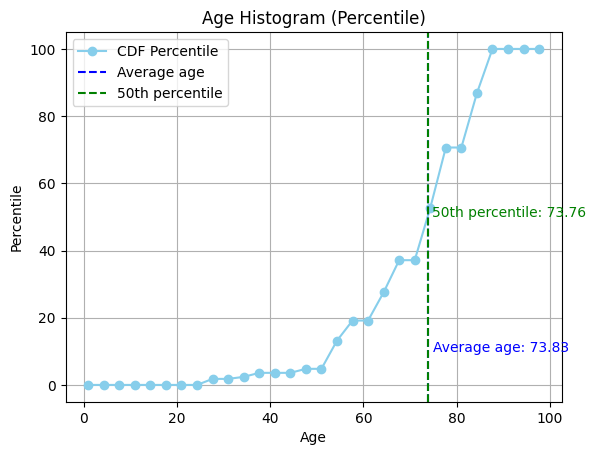

In [ ]:
# Age for with return ER
print('Filtered log: ', len(log_with_return_er['case:concept:name'].unique()))
age_column = log_with_return_er[log_with_return_er['Age'] > 0]['Age']
print('Age \n', age_column)
print('Age len \n', len(age_column))

age_column = log_with_return_er[(log_with_return_er['Age'] >= 1) & (log_with_return_er['Age'] <= 100)]['Age']

# Calculate histogram with 30 bins
hist, bins = np.histogram(age_column, bins=30, range=(1, 101), density=True)

# Calculate cumulative distribution function (CDF)
cdf = np.cumsum(hist)

# Normalize CDF to percentiles
cdf_percentile = (cdf / cdf[-1]) * 100

# Plot histogram as percentiles
plt.plot(bins[:-1], cdf_percentile, color='skyblue', marker='o', linestyle='-', label='CDF Percentile')
plt.xlabel('Age')
plt.ylabel('Percentile')
plt.title('Age Histogram (Percentile)')

# Calculate and plot average age
average_age = age_column.mean()
plt.axvline(x=average_age, color='blue', linestyle='--', label='Average age')
plt.text(average_age + 1, 10, f'Average age: {average_age:.2f}', color='blue')

# Find the value corresponding to 50th
percentile_50_value = np.interp(50, cdf_percentile, bins[:-1])


# Plot vertical lines at the
plt.axvline(x=percentile_50_value, color='green', linestyle='--', label='50th percentile')


# Annotate the plot with the values of the percentiles
plt.text(percentile_50_value + 1, 50, f'50th percentile: {percentile_50_value:.2f}', color='green')


# Add a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

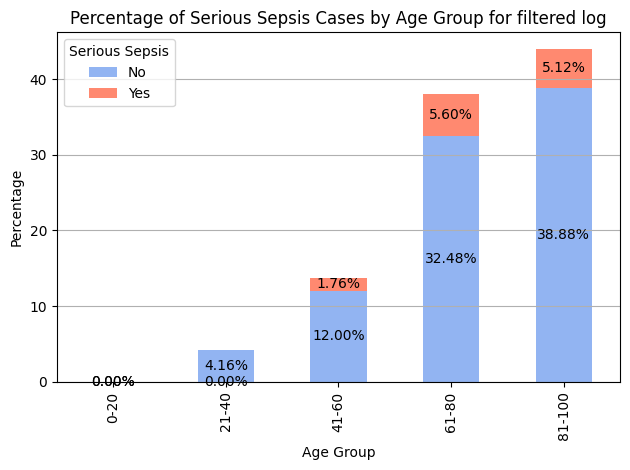

In [ ]:
# Plotting serious sepsis cases for filtered log per age group

# 1. Filter first rows of each case
first_rows = filtered_log.groupby('case:concept:name').first().reset_index()

# 2. Calculate average statistics for specified columns across all events in each case
aggregations = {
    'Leucocytes': 'mean',
    'CRP': 'mean',
    'LacticAcid': 'mean'
}

# Calculate aggregated statistics
case_averages = filtered_log.groupby('case:concept:name').agg(aggregations).reset_index()

# Rename columns to reflect Avg
case_averages.rename(columns={
    'Leucocytes': 'LeucocytesAvg',
    'CRP': 'CRPAvg',
    'LacticAcid': 'LacticAcidAvg'
}, inplace=True)

# Merge first rows with average statistics
first_rows_with_avg = pd.merge(first_rows, case_averages, on='case:concept:name', how='left')

# Merge these first rows with avg back into the original dataframe
filtered_log = pd.merge(filtered_log, first_rows_with_avg[['case:concept:name', 'LeucocytesAvg', 'CRPAvg', 'LacticAcidAvg']],
                  on='case:concept:name', how='left')

# Set the average columns to NaN for all rows except the first event of each case
filtered_log.loc[filtered_log.duplicated(subset=['case:concept:name'], keep='first'), ['LeucocytesAvg', 'CRPAvg', 'LacticAcidAvg']] = None

# Initialize serious_chance_sepsisx column with False
filtered_log['serious_chance_sepsisx'] = False

# Define the conditions for serious_chance_sepsisx
serious_conditions = (filtered_log['LacticAcidAvg'] > 2.0) & \
                     (filtered_log['CRPAvg'] > 50.0) & \
                     ((filtered_log['LeucocytesAvg'] < 4.0) | (filtered_log['LeucocytesAvg'] > 12.0))

# Update serious_chance_sepsisx column where conditions are True
filtered_log.loc[serious_conditions, 'serious_chance_sepsisx'] = True

# Define age bins and labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for age groups
filtered_log['age_group'] = pd.cut(filtered_log['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'age_group' and 'serious_chance_sepsisx' and count occurrences
serious_chance_sepsis_counts = filtered_log.groupby(['age_group', 'serious_chance_sepsisx']).size().unstack(fill_value=0)

# Calculate total counts to determine the percentage
total_counts = serious_chance_sepsis_counts.sum().sum()

# Calculate the percentage within each group for serious sepsis and non-serious sepsis
serious_chance_sepsis_percentage = (serious_chance_sepsis_counts / total_counts) * 100

# Plotting
plt.figure(figsize=(12, 6))
ax = serious_chance_sepsis_percentage.plot(kind='bar', stacked=True, alpha=0.7, color=['#6495ED','#FF5733'])
plt.title('Percentage of Serious Sepsis Cases by Age Group for filtered log')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Serious Sepsis', labels=['No', 'Yes'])
plt.tight_layout()
plt.grid(axis='y')

# Annotate the bars with percentage values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


<Figure size 1200x600 with 0 Axes>

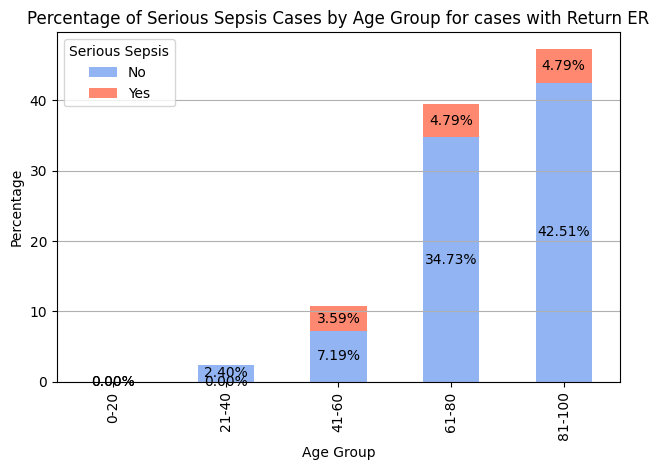

In [ ]:
# Plotting serious sepsis cases for log_with_return_erg per age group

# 1. Filter first rows of each case
first_rows = log_with_return_er.groupby('case:concept:name').first().reset_index()

# 2. Calculate average statistics for specified columns across all events in each case
aggregations = {
    'Leucocytes': 'mean',
    'CRP': 'mean',
    'LacticAcid': 'mean'
}

# Calculate aggregated statistics
case_averages = log_with_return_er.groupby('case:concept:name').agg(aggregations).reset_index()

# Rename columns to reflect Avg
case_averages.rename(columns={
    'Leucocytes': 'LeucocytesAvg',
    'CRP': 'CRPAvg',
    'LacticAcid': 'LacticAcidAvg'
}, inplace=True)

# Merge first rows with average statistics
first_rows_with_avg = pd.merge(first_rows, case_averages, on='case:concept:name', how='left')

# Merge these first rows with avg back into the original dataframe
log_with_return_er = pd.merge(log_with_return_er, first_rows_with_avg[['case:concept:name', 'LeucocytesAvg', 'CRPAvg', 'LacticAcidAvg']],
                  on='case:concept:name', how='left')

# Set the average columns to NaN for all rows except the first event of each case
log_with_return_er.loc[log_with_return_er.duplicated(subset=['case:concept:name'], keep='first'), ['LeucocytesAvg', 'CRPAvg', 'LacticAcidAvg']] = None

# Initialize serious_chance_sepsisx column with False
log_with_return_er['serious_chance_sepsisx'] = False

# Define the conditions for serious_chance_sepsisx
serious_conditions = (log_with_return_er['LacticAcidAvg'] > 2.0) & \
                     (log_with_return_er['CRPAvg'] > 50.0) & \
                     ((log_with_return_er['LeucocytesAvg'] < 4.0) | (log_with_return_er['LeucocytesAvg'] > 12.0))

# Update serious_chance_sepsisx column where conditions are True
log_with_return_er.loc[serious_conditions, 'serious_chance_sepsisx'] = True

# Define age bins and labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for age groups
log_with_return_er['age_group'] = pd.cut(log_with_return_er['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'age_group' and 'serious_chance_sepsisx' and count occurrences
serious_chance_sepsis_counts = log_with_return_er.groupby(['age_group', 'serious_chance_sepsisx']).size().unstack(fill_value=0)

# Calculate total counts to determine the percentage
total_counts = serious_chance_sepsis_counts.sum().sum()

# Calculate the percentage within each group for serious sepsis and non-serious sepsis
serious_chance_sepsis_percentage = (serious_chance_sepsis_counts / total_counts) * 100

# Plotting
plt.figure(figsize=(12, 6))
ax = serious_chance_sepsis_percentage.plot(kind='bar', stacked=True, alpha=0.7, color=['#6495ED','#FF5733'])
plt.title('Percentage of Serious Sepsis Cases by Age Group for cases with Return ER')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Serious Sepsis', labels=['No', 'Yes'])
plt.tight_layout()
plt.grid(axis='y')

# Annotate the bars with percentage values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


<Figure size 1200x600 with 0 Axes>

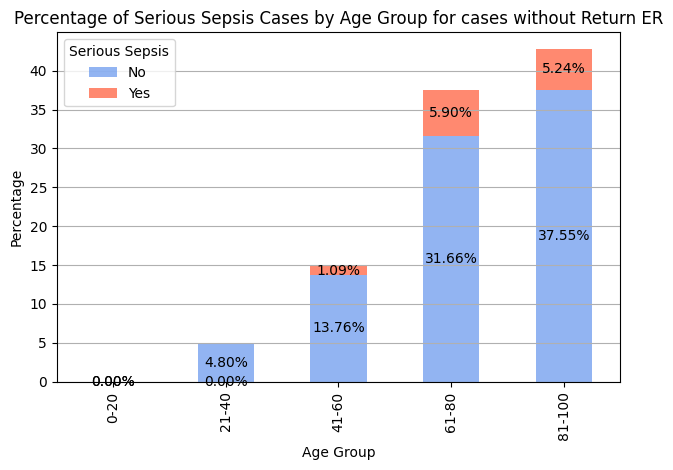

In [ ]:
 Plotting serious sepsis cases for log_without_return_erg per age group


# 1. Filter first rows of each case
first_rows = log_without_return_er.groupby('case:concept:name').first().reset_index()

# 2. Calculate average statistics for specified columns across all events in each case
aggregations = {
    'Leucocytes': 'mean',
    'CRP': 'mean',
    'LacticAcid': 'mean'
}

# Calculate aggregated statistics
case_averages = log_without_return_er.groupby('case:concept:name').agg(aggregations).reset_index()

# Rename columns to reflect Avg
case_averages.rename(columns={
    'Leucocytes': 'LeucocytesAvg',
    'CRP': 'CRPAvg',
    'LacticAcid': 'LacticAcidAvg'
}, inplace=True)

# Merge first rows with average statistics
first_rows_with_avg = pd.merge(first_rows, case_averages, on='case:concept:name', how='left')

# Merge these first rows with avg back into the original dataframe
log_without_return_er = pd.merge(log_without_return_er, first_rows_with_avg[['case:concept:name', 'LeucocytesAvg', 'CRPAvg', 'LacticAcidAvg']],
                  on='case:concept:name', how='left')

# Set the average columns to NaN for all rows except the first event of each case
log_without_return_er.loc[log_without_return_er.duplicated(subset=['case:concept:name'], keep='first'), ['LeucocytesAvg', 'CRPAvg', 'LacticAcidAvg']] = None

# Initialize serious_chance_sepsisx column with False
log_without_return_er['serious_chance_sepsisx'] = False

# Define the conditions for serious_chance_sepsisx
serious_conditions = (log_without_return_er['LacticAcidAvg'] > 2.0) & \
                     (log_without_return_er['CRPAvg'] > 50.0) & \
                     ((log_without_return_er['LeucocytesAvg'] < 4.0) | (log_without_return_er['LeucocytesAvg'] > 12.0))

# Update serious_chance_sepsisx column where conditions are True
log_without_return_er.loc[serious_conditions, 'serious_chance_sepsisx'] = True

# Define age bins and labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for age groups
log_without_return_er['age_group'] = pd.cut(log_without_return_er['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'age_group' and 'serious_chance_sepsisx' and count occurrences
serious_chance_sepsis_counts = log_without_return_er.groupby(['age_group', 'serious_chance_sepsisx']).size().unstack(fill_value=0)

# Calculate total counts to determine the percentage
total_counts = serious_chance_sepsis_counts.sum().sum()

# Calculate the percentage within each group for serious sepsis and non-serious sepsis
serious_chance_sepsis_percentage = (serious_chance_sepsis_counts / total_counts) * 100

# Plotting
plt.figure(figsize=(12, 6))
ax = serious_chance_sepsis_percentage.plot(kind='bar', stacked=True, alpha=0.7, color=['#6495ED','#FF5733'])
plt.title('Percentage of Serious Sepsis Cases by Age Group for cases without Return ER')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Serious Sepsis', labels=['No', 'Yes'])
plt.tight_layout()
plt.grid(axis='y')

# Annotate the bars with percentage values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


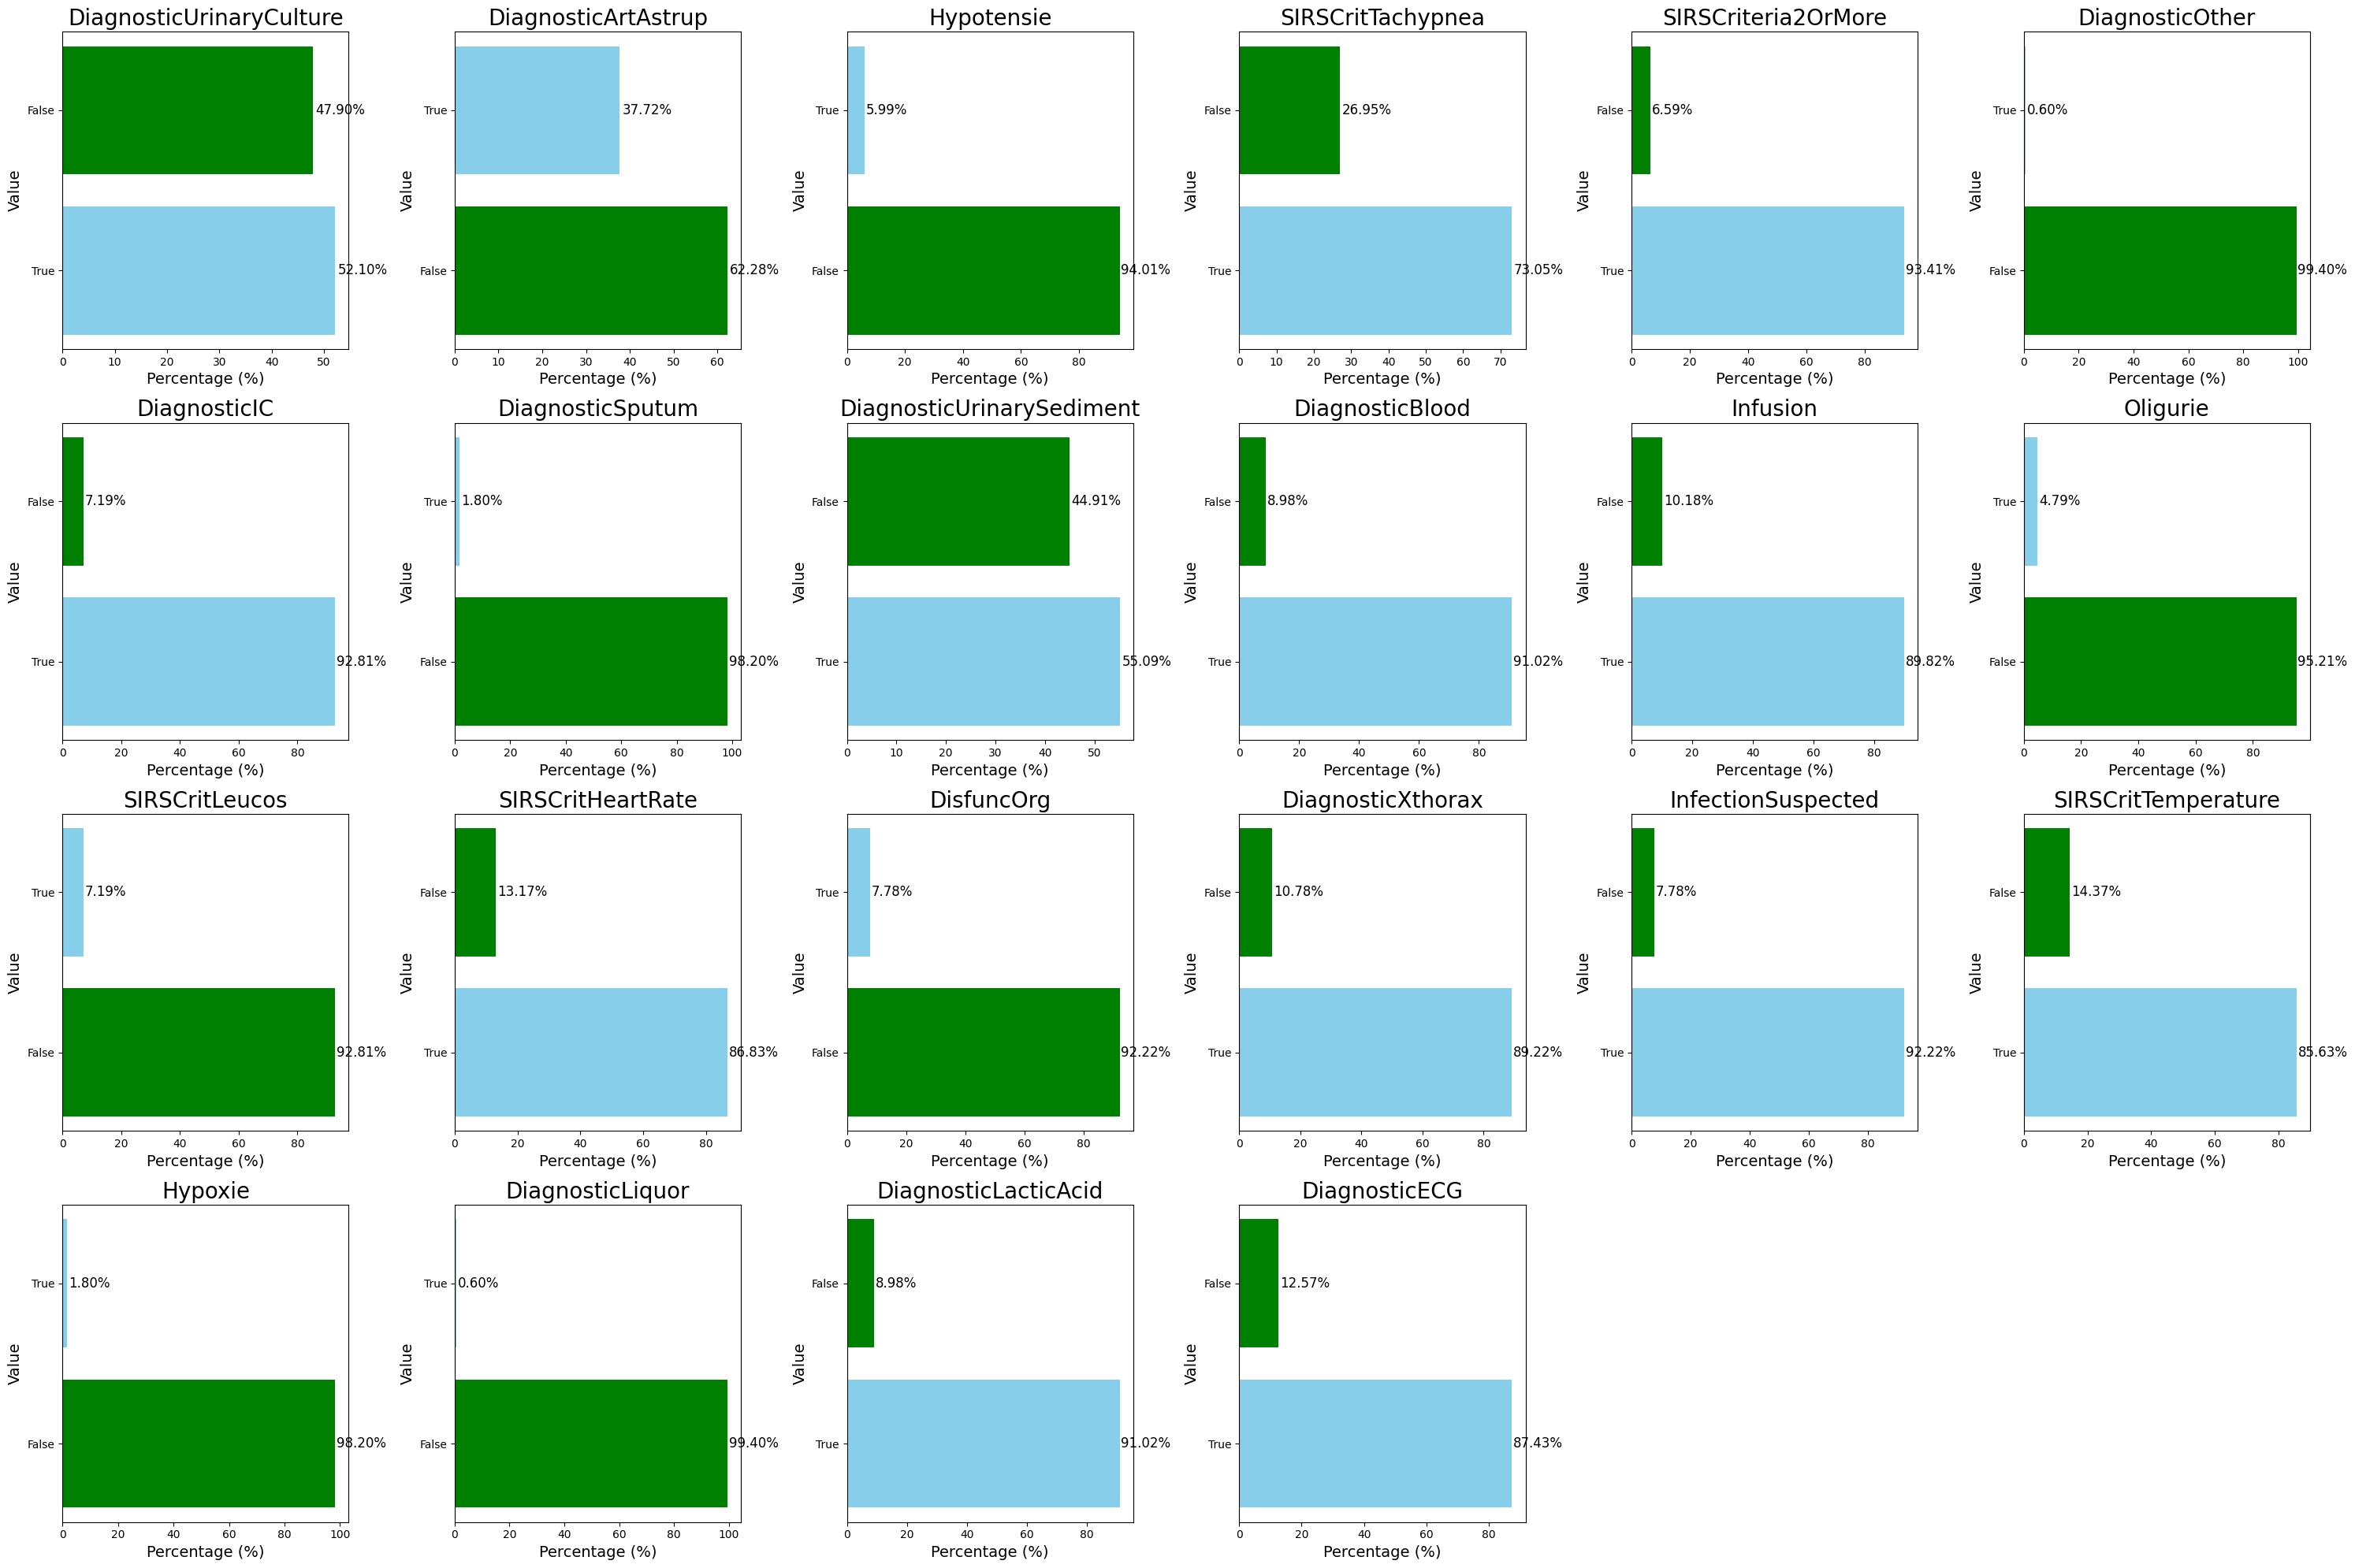

In [ ]:
# Diagnostic parameters for patients who return
# List of columns of interest
columns_of_interest = [
    'DiagnosticUrinaryCulture', 'DiagnosticArtAstrup', 'Hypotensie', 'SIRSCritTachypnea', 'SIRSCriteria2OrMore',
    'DiagnosticOther', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticUrinarySediment', 'DiagnosticBlood',
    'Infusion', 'Oligurie', 'SIRSCritLeucos', 'SIRSCritHeartRate', 'DisfuncOrg', 'DiagnosticXthorax',
    'InfectionSuspected', 'SIRSCritTemperature', 'Hypoxie', 'DiagnosticLiquor', 'DiagnosticLacticAcid', 'DiagnosticECG'
]


# Define colors for True and False
color_map = {True: 'skyblue', False: 'green'}

# Create a figure with a grid of subplots (4 rows, 6 columns)
fig, axes = plt.subplots(4, 6, figsize=(30, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create a bar chart for each
for idx, column in enumerate(columns_of_interest):
    if column in log_with_return_er.columns:
        counts = log_with_return_er[column].value_counts()
        # print(counts)
        total = counts.sum()  # Get the total count to calculate percentages
        percentages = (counts / total) * 100  # Calculate percentages

        labels = counts.index.astype(str).tolist()  # Convert index to list of strings

        # Assign colors based on True/False values
        colors = [color_map.get(value, 'gray') for value in counts.index]

        # Create a horizontal bar chart
        bars = axes[idx].barh(labels, percentages.values, color=colors)
        axes[idx].set_title(column, fontsize=20)  # Set font size of subplot title
        axes[idx].set_xlabel('Percentage (%)', fontsize=14)
        axes[idx].set_ylabel('Value', fontsize=14)

        # Add value labels to the bars
        for bar in bars:
            width = bar.get_width()
            axes[idx].text(width + 0.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%',
                           va='center', ha='left', fontsize=12, color='black')

# Remove any unused subplots (if any)
for idx in range(len(columns_of_interest), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


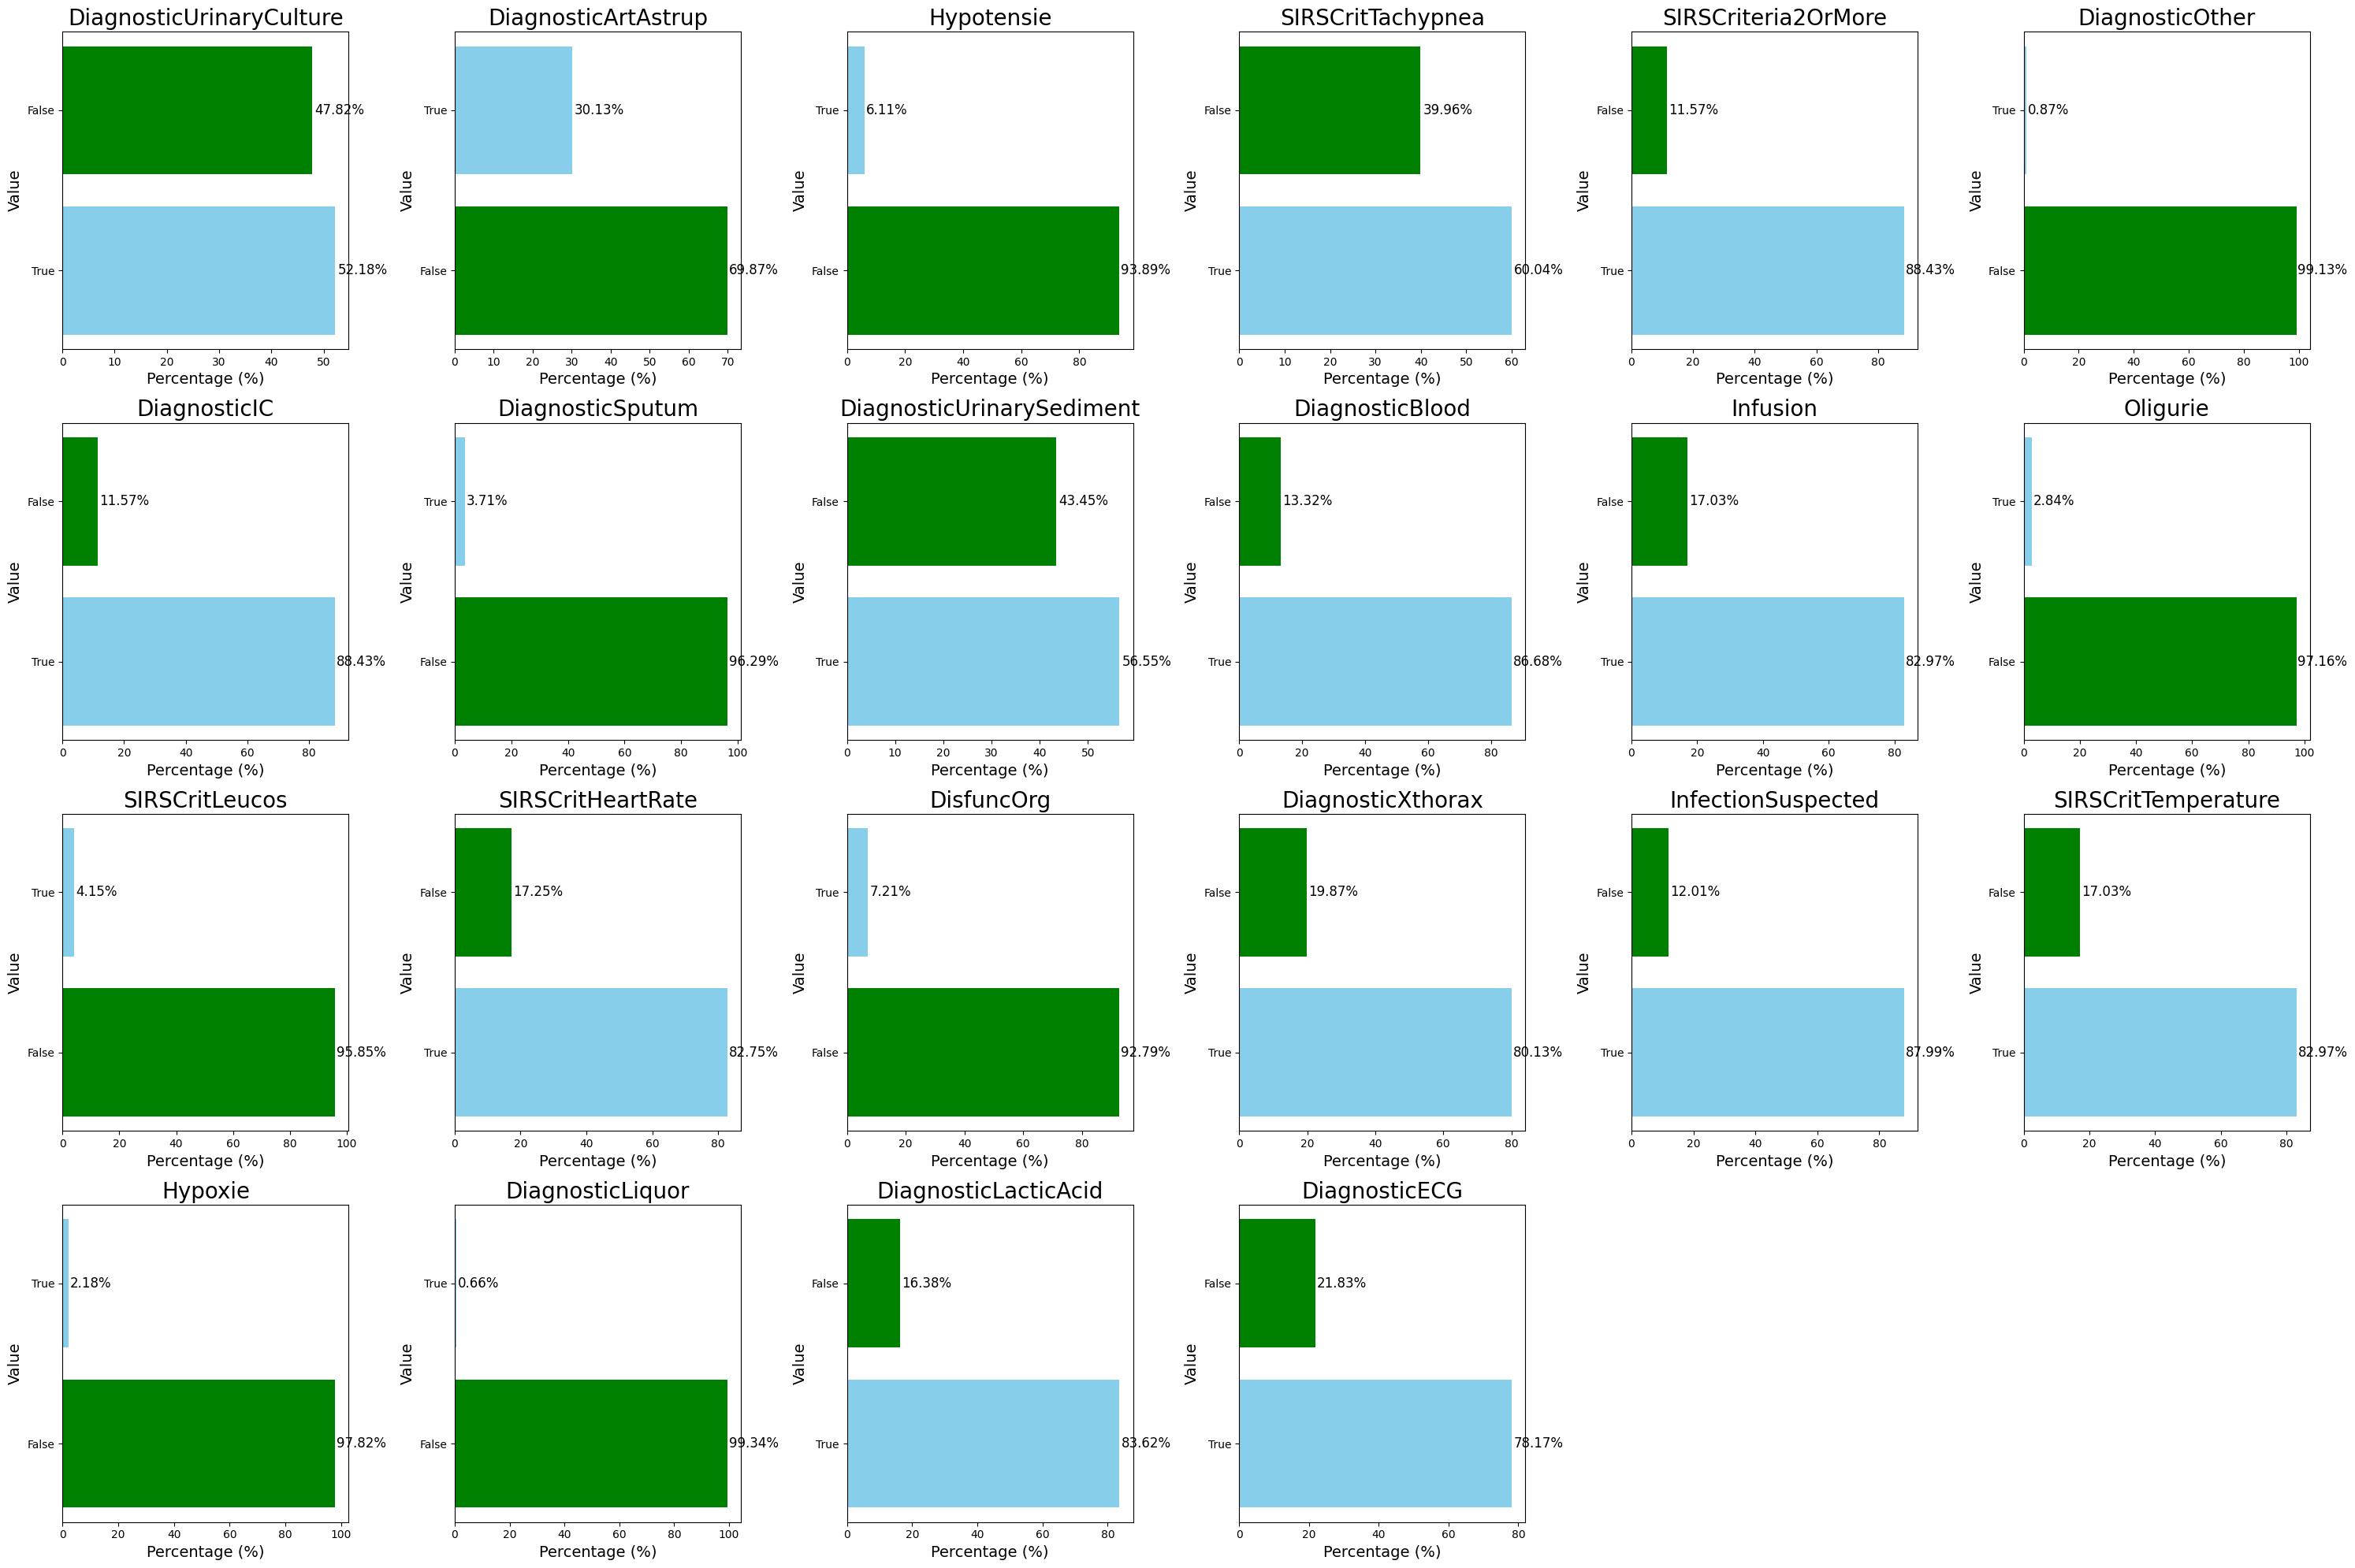

In [ ]:
#  Diagnostic parameters for patients who don't return
# List of columns of interest
columns_of_interest = [
    'DiagnosticUrinaryCulture', 'DiagnosticArtAstrup', 'Hypotensie', 'SIRSCritTachypnea', 'SIRSCriteria2OrMore',
    'DiagnosticOther', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticUrinarySediment', 'DiagnosticBlood',
    'Infusion', 'Oligurie', 'SIRSCritLeucos', 'SIRSCritHeartRate', 'DisfuncOrg', 'DiagnosticXthorax',
    'InfectionSuspected', 'SIRSCritTemperature', 'Hypoxie', 'DiagnosticLiquor', 'DiagnosticLacticAcid', 'DiagnosticECG'
]


# Define colors for True and False
color_map = {True: 'skyblue', False: 'green'}

# Create a figure with a grid of subplots (4 rows, 6 columns)
fig, axes = plt.subplots(4, 6, figsize=(30, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create a bar chart for each
for idx, column in enumerate(columns_of_interest):
    if column in log_without_return_er.columns:
        counts = log_without_return_er[column].value_counts()
        total = counts.sum()  # Get the total count to calculate percentages
        percentages = (counts / total) * 100  # Calculate percentages

        labels = counts.index.astype(str).tolist()  # Convert index to list of strings

        # Assign colors based on True/False values
        colors = [color_map.get(value, 'gray') for value in counts.index]

        # Create a horizontal bar chart
        bars = axes[idx].barh(labels, percentages.values, color=colors)
        axes[idx].set_title(column, fontsize=20)  # Set font size of subplot title
        axes[idx].set_xlabel('Percentage (%)', fontsize=14)
        axes[idx].set_ylabel('Value', fontsize=14)

        # Add value labels to the bars
        for bar in bars:
            width = bar.get_width()
            axes[idx].text(width + 0.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%',
                           va='center', ha='left', fontsize=12, color='black')

# Remove any unused subplots (if any)
for idx in range(len(columns_of_interest), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


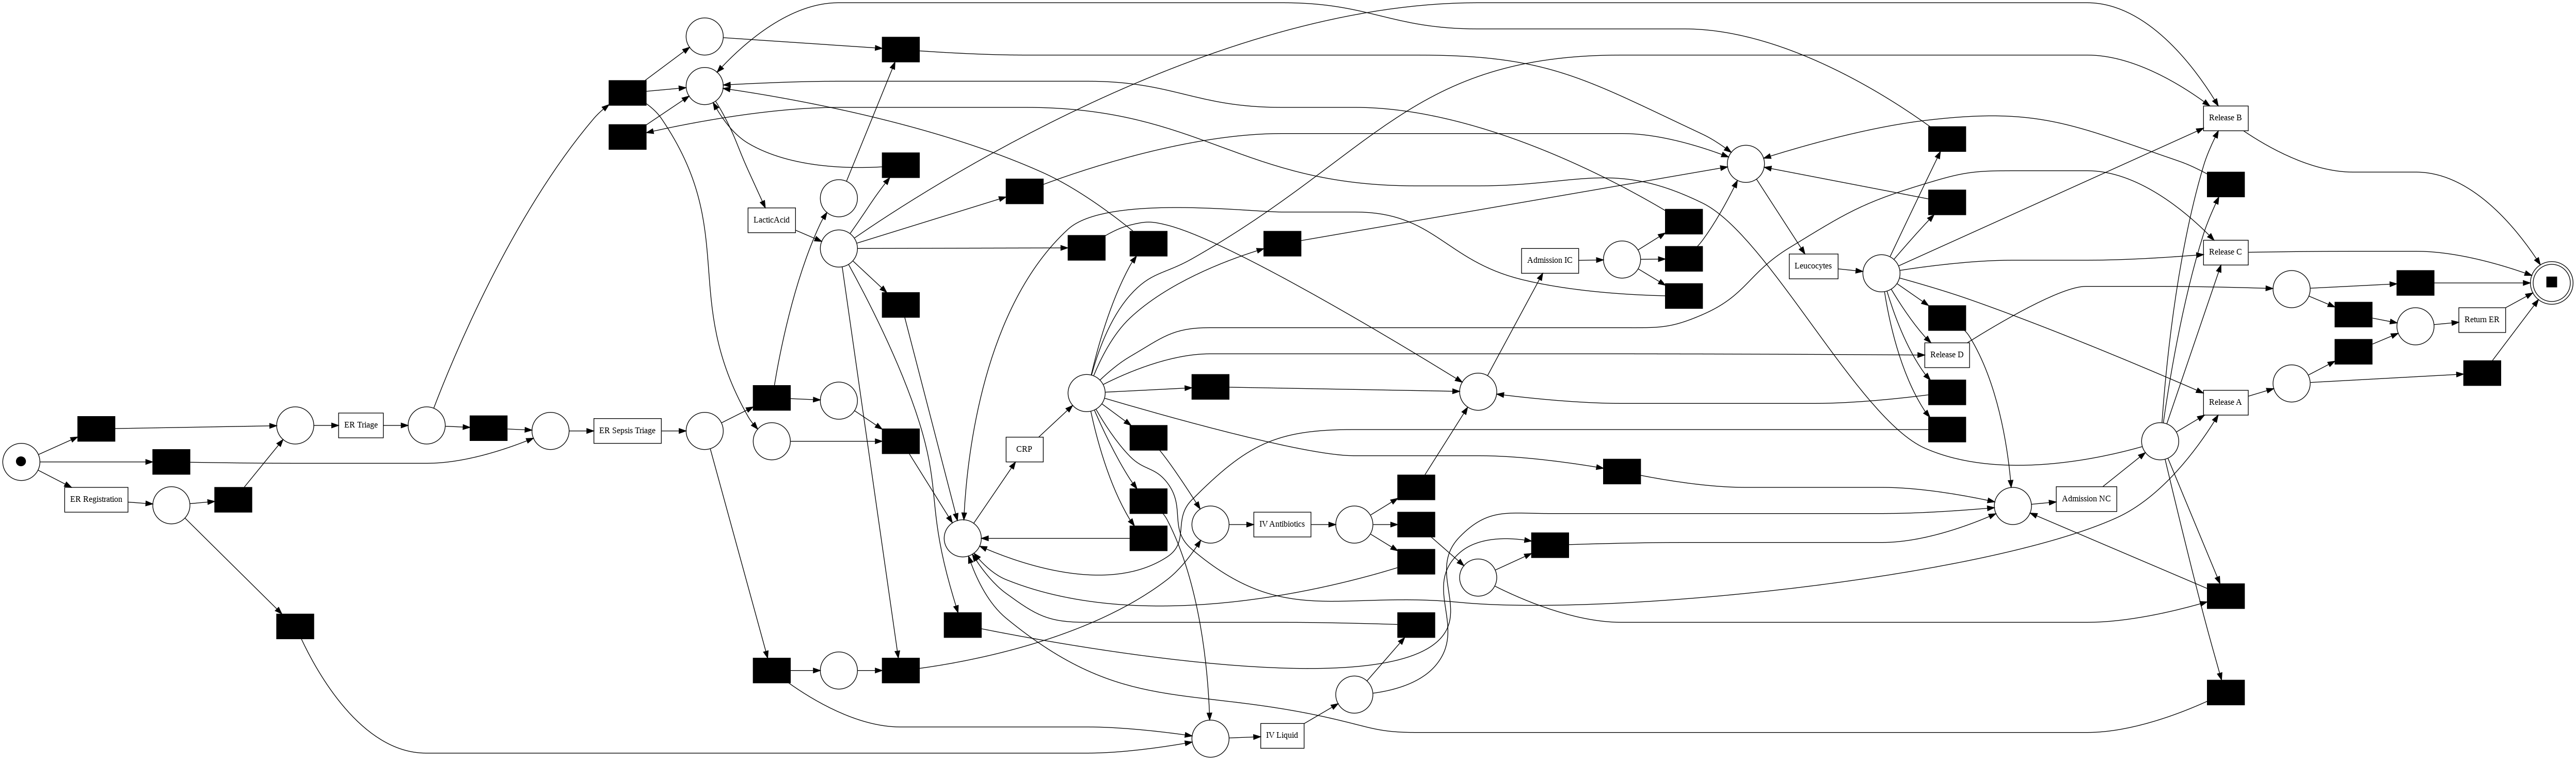

replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

Fitness: 0.9094654295964946


replaying log with TBR, completed traces ::   0%|          | 0/4357 [00:00<?, ?it/s]

Precision: 0.8878637331440739


replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

Generalization: 0.8492461400330914
Simplicity: 0.49171270718232046


replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       823   False       0.968750        3          0        45        48
1       899   False       0.910973        3          1        21        23
2       794   False       0.927731        3          2        34        35
3       748   False       0.890110        4          2        26        28
4       299   False       0.959459        3          0        34        37
..      ...     ...            ...      ...        ...       ...       ...
620     945   False       0.819876        5          3        21        23
621     917   False       0.885926        4          2        25        27
622     759   False       0.929757        3          1        27        29
623      77   False       0.865424        4          2        21        23
624     885   False       0.901001        4          2        29        31

[625 rows x 7 columns]

In [ ]:
# Filtered log 1 - Discover the model with Heuristic Miner

net, im, fm = pm4py.discover_petri_net_heuristics(filtered_log, dependency_threshold=0.8)
pm4py.view_petri_net(net, im, fm, format='png')


# Fitness, Precision, Generalization, and Simplicity

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=filtered_log,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=filtered_log,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=filtered_log,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics


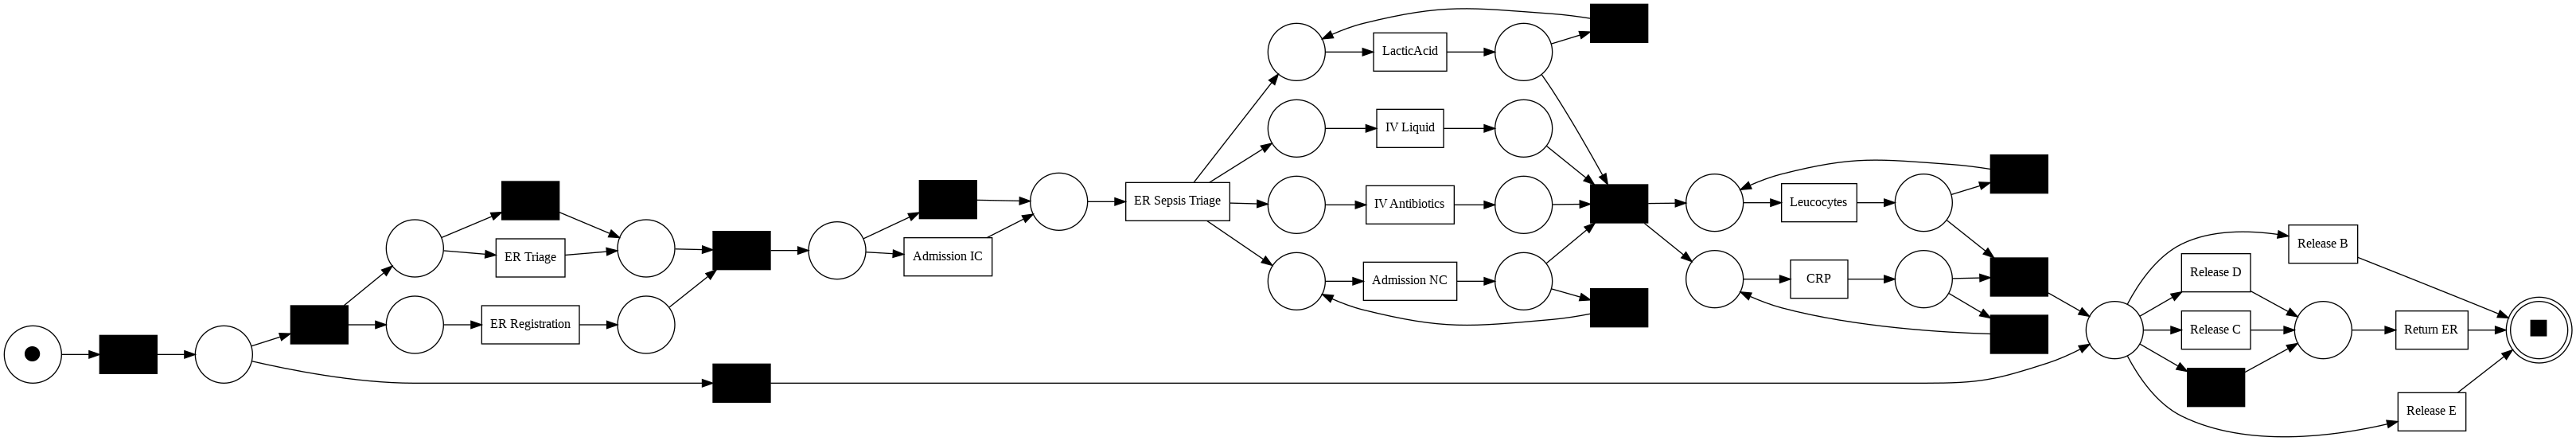

aligning log, completed variants ::   0%|          | 0/584 [00:00<?, ?it/s]

Fitness: 0.6781227476637626


computing precision with alignments, completed variants ::   0%|          | 0/4357 [00:00<?, ?it/s]

Precision: 0.5181312356101304


replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

Generalization: 0.8796920979135635
Simplicity: 0.6296296296296295


replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       823   False       0.891696        4          5        42        41
1       899   False       0.852130        2          4        21        19
2       794   False       0.889113        3          4        32        31
3       748   False       0.920000        2          2        25        25
4       299   False       0.939394        2          2        33        33
..      ...     ...            ...      ...        ...       ...       ...
620     945   False       0.733333        3          6        18        15
621     917   False       0.837662        3          4        22        21
622     759   False       0.851449        3          4        24        23
623      77   False       0.733333        3          6        18        15
624     885   False       0.863077        3          4        26        25

[625 rows x 7 columns]

In [ ]:
# Filtered log 2 - Discover the model with Petri net
net, im, fm = pm4py.discover_petri_net_inductive(filtered_log, noise_threshold=0.8)
pm4py.view_petri_net(net, im, fm, format='png')


# Fitness, Precision, Generalization, and Simplicity

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=filtered_log,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=filtered_log,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=filtered_log,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics


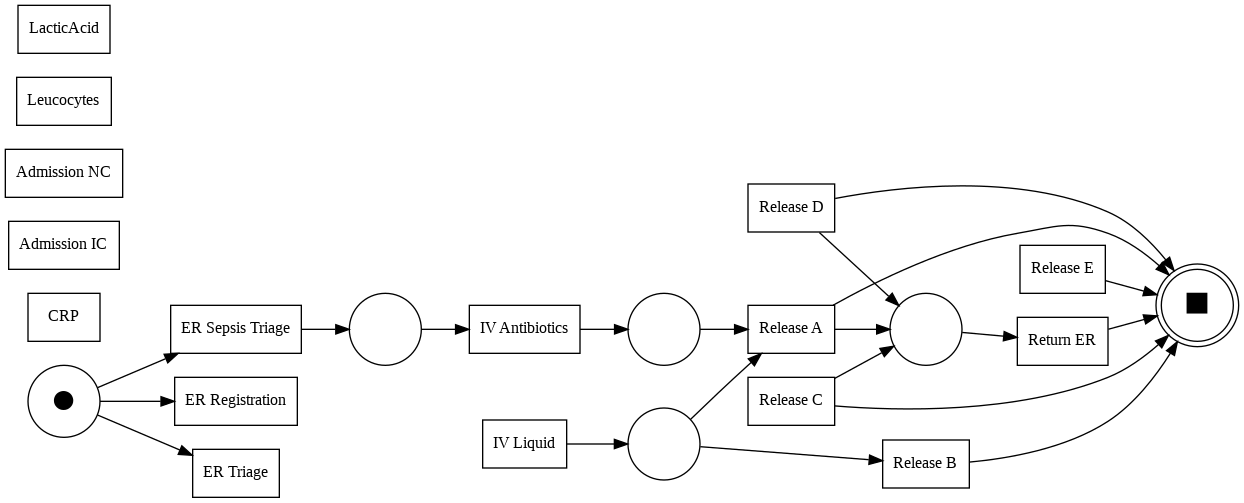

aligning log, completed variants ::   0%|          | 0/584 [00:00<?, ?it/s]

Fitness: 0.7332078377684607


computing precision with alignments, completed variants ::   0%|          | 0/4357 [00:00<?, ?it/s]

Precision: 0.3163330721561365


replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

Generalization: 0.9003923744097759
Simplicity: 1.0


replaying log with TBR, completed traces ::   0%|          | 0/584 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       823   False       0.773810        2          1         6         7
1       899   False       0.803571        2          1         7         8
2       794   False       0.773810        2          1         6         7
3       748   False       0.803571        2          1         7         8
4       299   False       0.803571        2          1         7         8
..      ...     ...            ...      ...        ...       ...       ...
620     945   False       0.773810        2          1         6         7
621     917   False       0.773810        2          1         6         7
622     759   False       0.773810        2          1         6         7
623      77   False       0.773810        2          1         6         7
624     885   False       0.773810        2          1         6         7

[625 rows x 7 columns]

In [ ]:
# Filtered log 3 - Discover the model with Alpha Miner

net, im, fm = pm4py.discover_petri_net_alpha(filtered_log)
pm4py.view_petri_net(net, im, fm, format='png')

# Fitness, Precision, Generalization, and Simplicity

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=filtered_log,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=filtered_log,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=filtered_log,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics


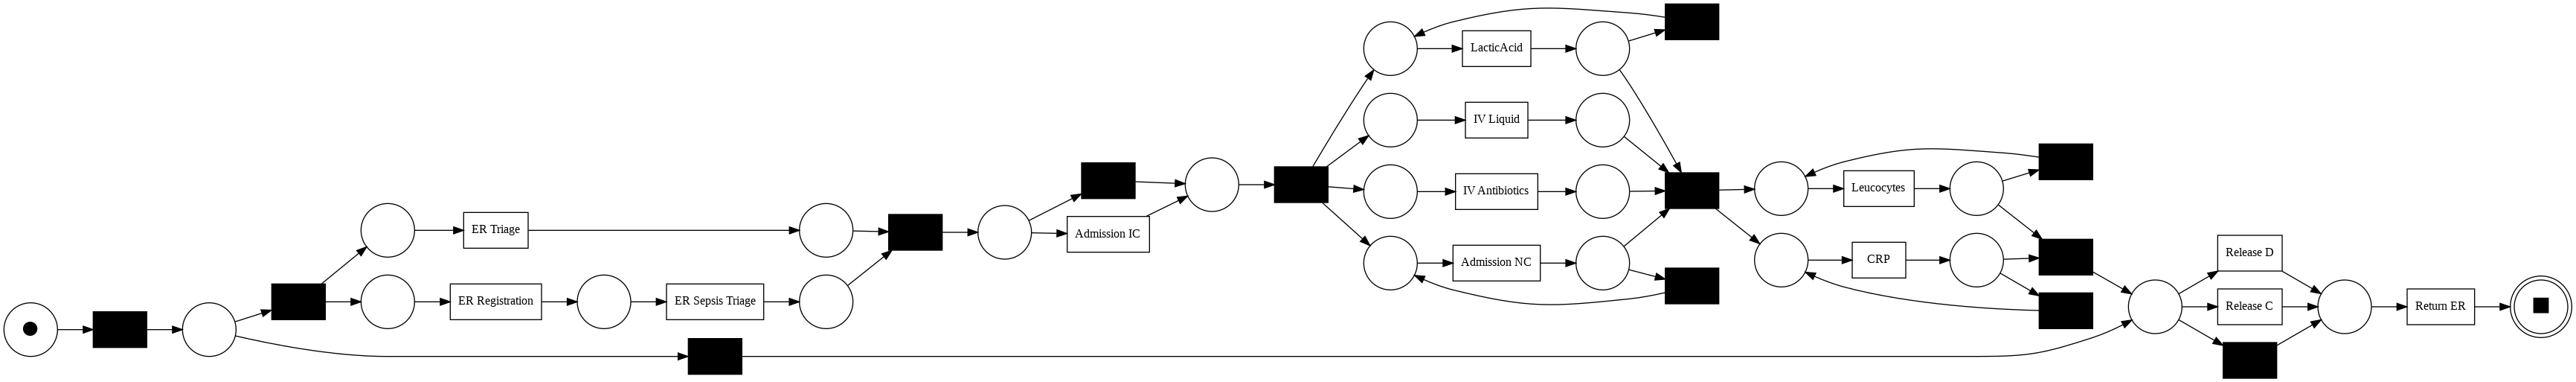

aligning log, completed variants ::   0%|          | 0/159 [00:00<?, ?it/s]

Fitness: 0.7350401890603481


computing precision with alignments, completed variants ::   0%|          | 0/1782 [00:00<?, ?it/s]

Precision: 0.5700397702165267


replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

Generalization: 0.855158391861325
Simplicity: 0.6756756756756757


replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       899   False       0.859091        2          4        22        20
1       748   False       0.923077        2          2        26        26
2       299   False       0.941176        2          2        34        34
3       451   False       0.882353        4          4        34        34
4       296   False       0.956522        2          2        46        46
..      ...     ...            ...      ...        ...       ...       ...
162     711   False       0.881410        3          6        39        36
163     580   False       0.849282        3          8        38        33
164    1019   False       0.965517        2          2        58        58
165     697   False       0.915033        3          6        54        51
166     806   False       0.923077        2          2        26        26

[167 rows x 7 columns]

In [ ]:
# Log with return er - Discover the model with Petri net
net, im, fm = pm4py.discover_petri_net_inductive(log_with_return_er, noise_threshold=0.8)
pm4py.view_petri_net(net, im, fm, format='png')

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=log_with_return_er,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=log_with_return_er,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=log_with_return_er,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_with_return_er, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics



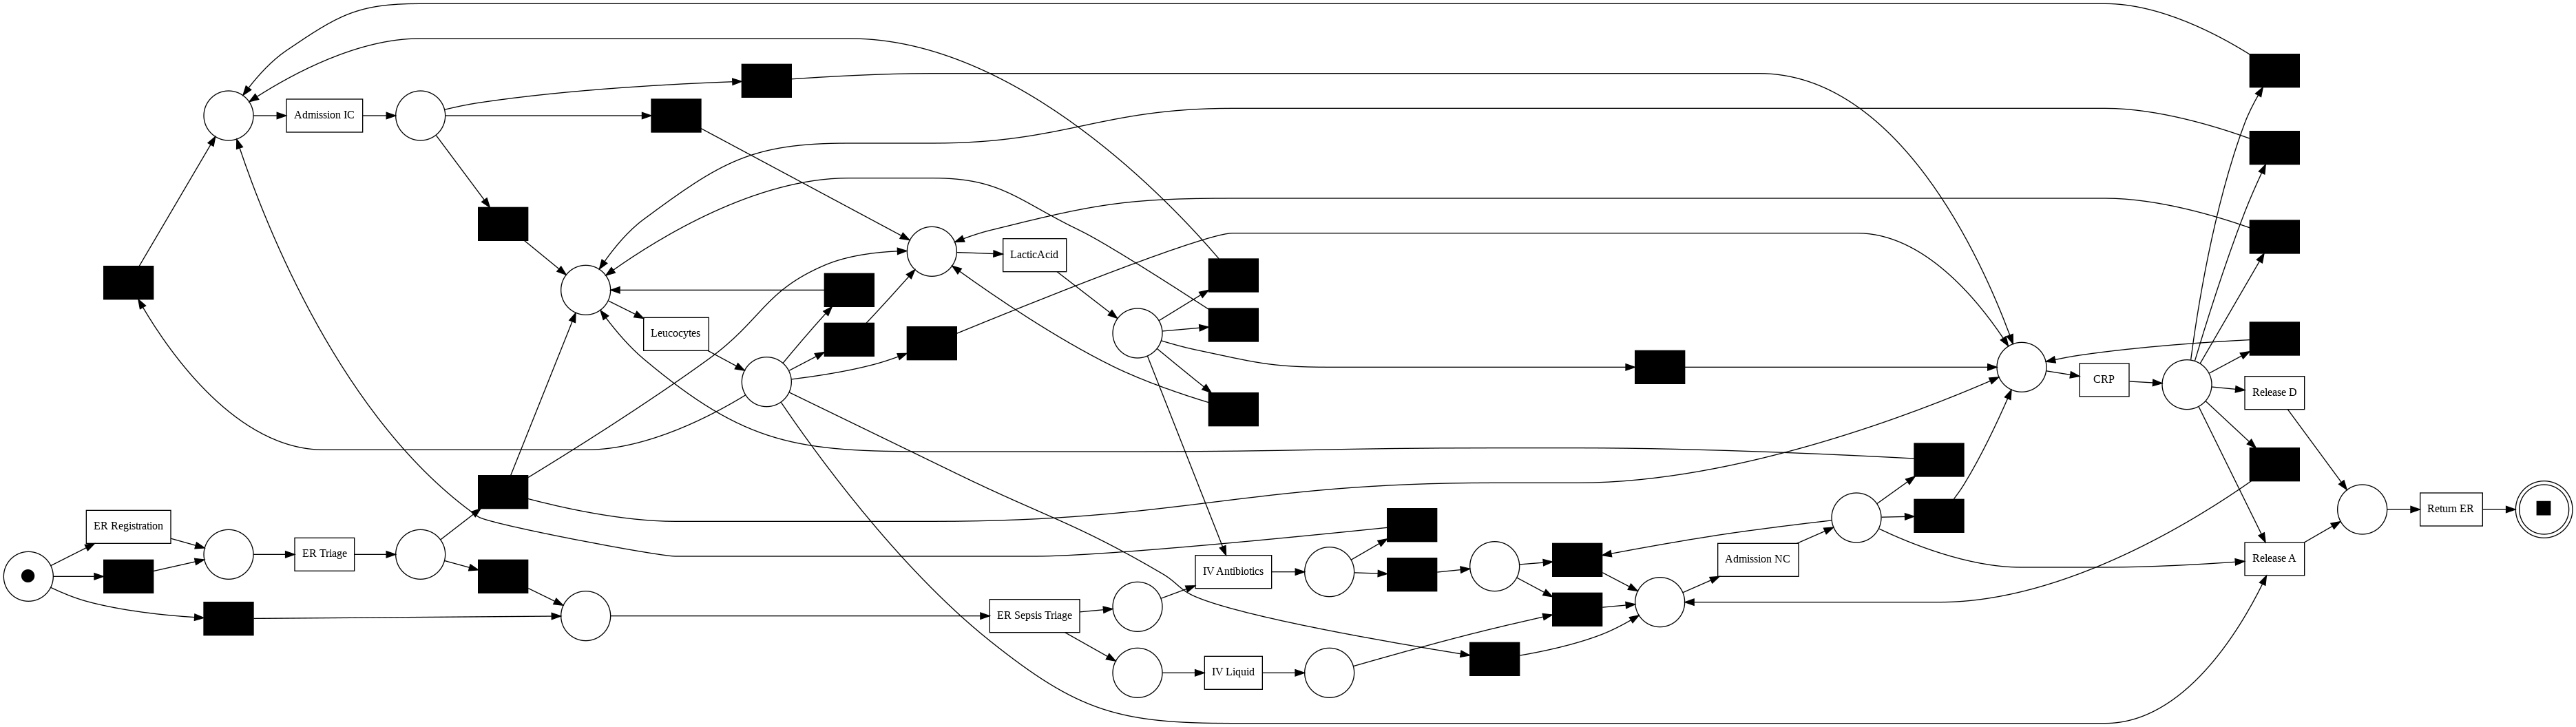

aligning log, completed variants ::   0%|          | 0/159 [00:00<?, ?it/s]

Fitness: 0.8830572401715705


computing precision with alignments, completed variants ::   0%|          | 0/1782 [00:00<?, ?it/s]

Precision: 0.8182825484764543


replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

Generalization: 0.7930873488889143
Simplicity: 0.5304347826086956


replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       899   False       0.928571        3          0        18        21
1       748   False       0.865424        4          2        21        23
2       299   False       0.954545        3          0        30        33
3       451   False       0.896552        3          3        29        29
4       296   False       0.929098        4          2        41        43
..      ...     ...            ...      ...        ...       ...       ...
162     711   False       0.907136        4          2        31        33
163     580   False       0.907136        4          2        31        33
164    1019   False       0.973684        3          0        54        57
165     697   False       0.958749        3          1        47        49
166     806   False       0.865424        4          2        21        23

[167 rows x 7 columns]

In [ ]:
# log with return - Discover the model with heuristics
net, im, fm = pm4py.discover_petri_net_heuristics(log_with_return_er, dependency_threshold=0.8)
pm4py.view_petri_net(net, im, fm, format='png')

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=log_with_return_er,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=log_with_return_er,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=log_with_return_er,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_with_return_er, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics



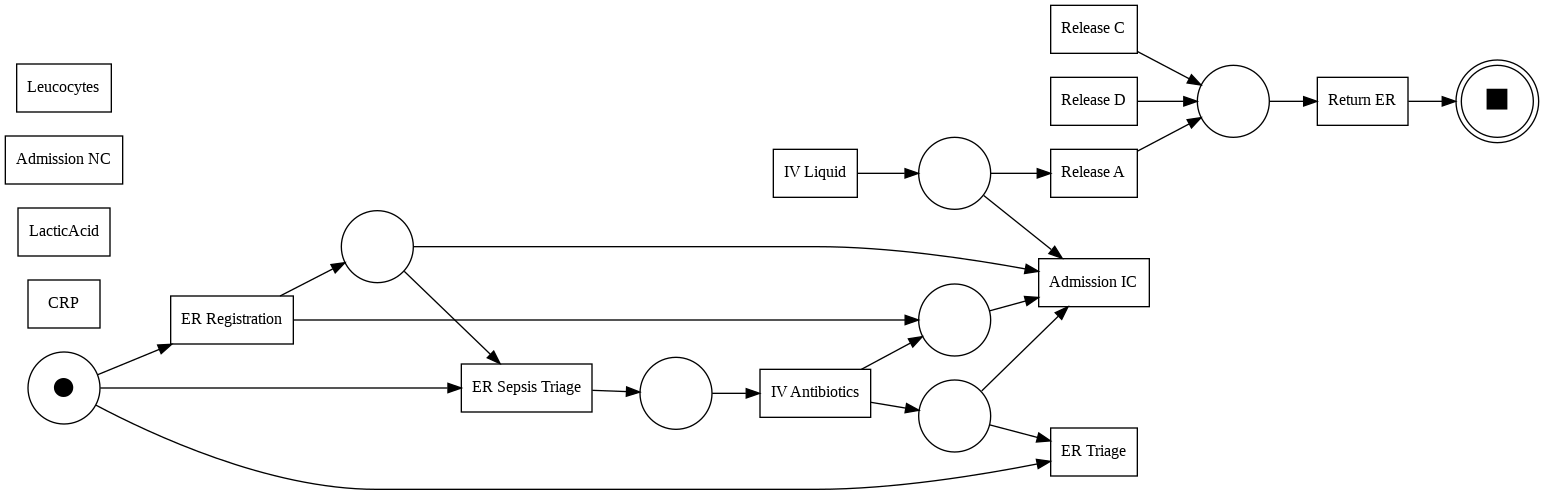

replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

Fitness: 0.6640204843626897


replaying log with TBR, completed traces ::   0%|          | 0/1782 [00:00<?, ?it/s]

Precision: 0.25817622162370146


replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

Generalization: 0.8640884020263779
Simplicity: 1.0


replaying log with TBR, completed traces ::   0%|          | 0/159 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       899   False       0.666667        3          3         9         9
1       748   False       0.666667        3          3         9         9
2       299   False       0.666667        3          3         9         9
3       451   False       0.666667        3          3         9         9
4       296   False       0.666667        3          3         9         9
..      ...     ...            ...      ...        ...       ...       ...
162     711   False       0.752137        5          1         9        13
163     580   False       0.752137        5          1         9        13
164    1019   False       0.666667        3          3         9         9
165     697   False       0.752137        5          1         9        13
166     806   False       0.666667        3          3         9         9

[167 rows x 7 columns]

In [ ]:
# log with return - Discover the model with alpha miner
net, im, fm = pm4py.discover_petri_net_alpha(log_with_return_er)
pm4py.view_petri_net(net, im, fm, format='png')

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=log_with_return_er,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=log_with_return_er,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=log_with_return_er,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_with_return_er, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics



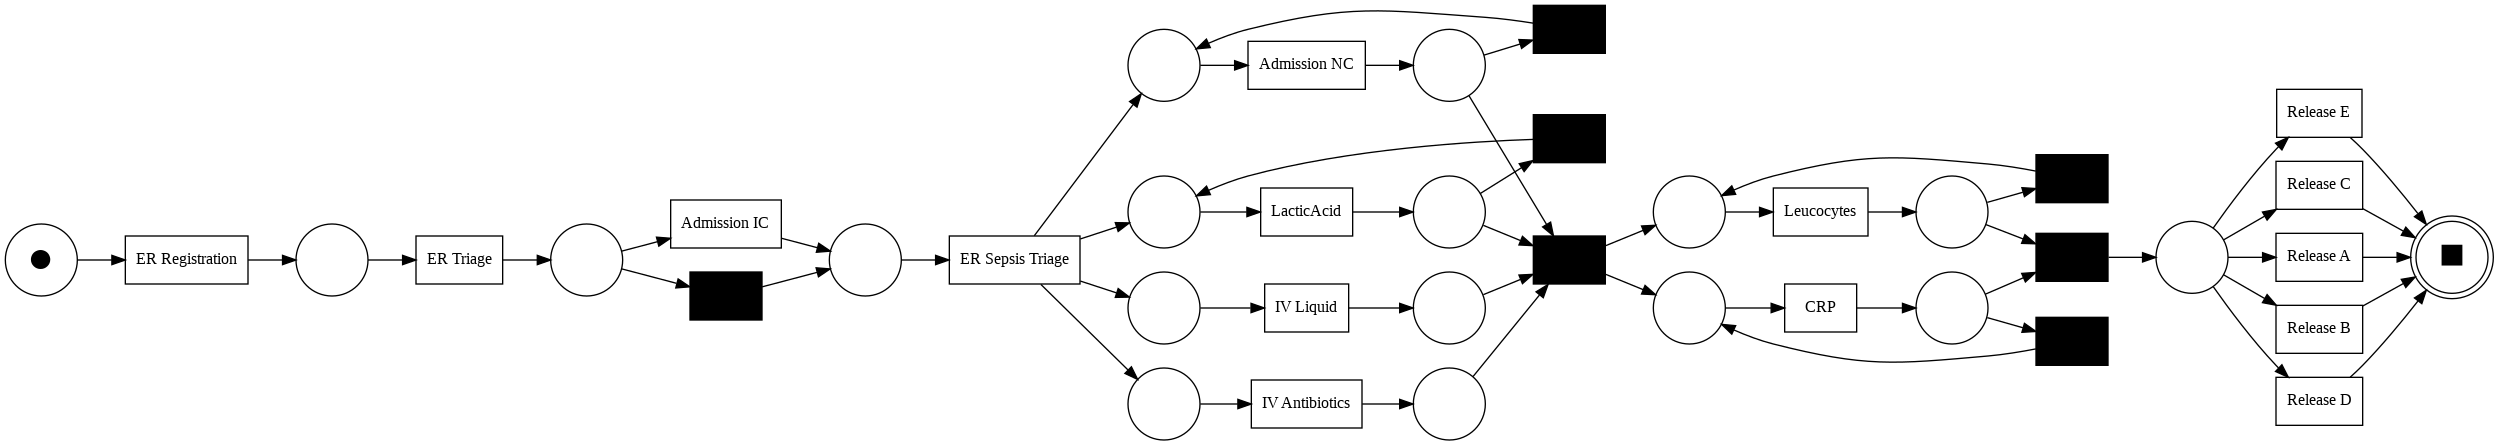

aligning log, completed variants ::   0%|          | 0/425 [00:00<?, ?it/s]

Fitness: 0.8386637443017867


computing precision with alignments, completed variants ::   0%|          | 0/2962 [00:00<?, ?it/s]

Precision: 0.7723248165949912


replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

Generalization: 0.906799765154853
Simplicity: 0.625


replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       823   False       0.925000        3          3        40        40
1       794   False       0.933333        2          2        30        30
2       620   False       0.880000        3          3        25        25
3        16   False       0.835913        2          4        19        17
4       438   False       0.900000        2          2        20        20
..      ...     ...            ...      ...        ...       ...       ...
453     945   False       0.803571        2          4        16        14
454     917   False       0.900000        2          2        20        20
455     759   False       0.909091        2          2        22        22
456      77   False       0.803571        2          4        16        14
457     885   False       0.916667        2          2        24        24

[458 rows x 7 columns]

In [ ]:
# Log with return er - Discover the model with Petri net
net, im, fm = pm4py.discover_petri_net_inductive(log_without_return_er, noise_threshold=0.8)
pm4py.view_petri_net(net, im, fm, format='png')

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=log_without_return_er,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=log_without_return_er,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=log_without_return_er,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_without_return_er, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics



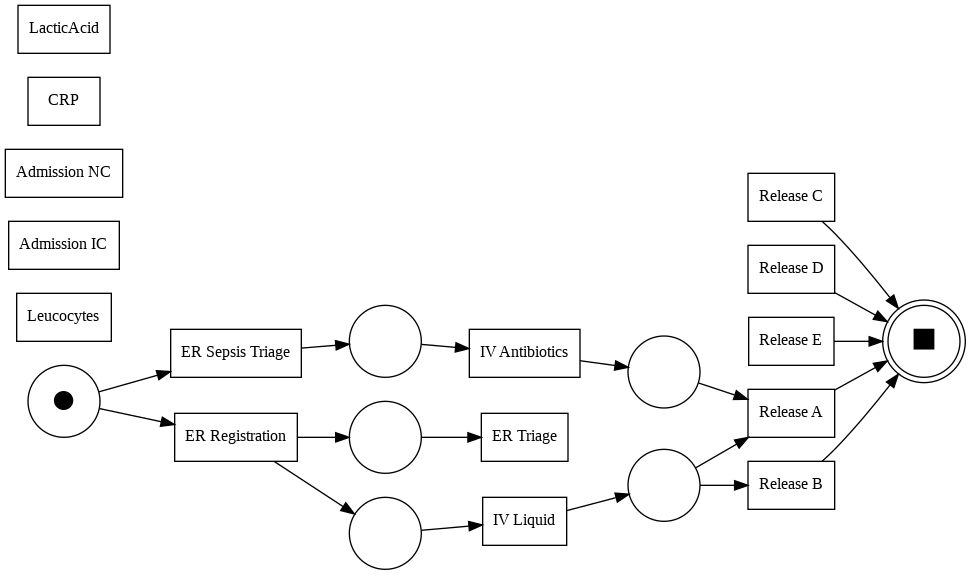

aligning log, completed variants ::   0%|          | 0/425 [00:00<?, ?it/s]

Fitness: 0.8055066079295155


computing precision with alignments, completed variants ::   0%|          | 0/2962 [00:00<?, ?it/s]

Precision: 0.3372992653273519


replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

Generalization: 0.8879632069683969
Simplicity: 1.0


replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       823   False        0.93750        1          0         7         8
1       794   False        0.93750        1          0         7         8
2       620   False        0.93750        1          0         7         8
3        16   False        0.77381        2          1         6         7
4       438   False        0.93750        1          0         7         8
..      ...     ...            ...      ...        ...       ...       ...
453     945   False        0.93750        1          0         7         8
454     917   False        0.93750        1          0         7         8
455     759   False        0.93750        1          0         7         8
456      77   False        0.93750        1          0         7         8
457     885   False        0.93750        1          0         7         8

[458 rows x 7 columns]

In [ ]:
# log with return - Discover the model with alpha miner
net, im, fm = pm4py.discover_petri_net_alpha(log_without_return_er)
pm4py.view_petri_net(net, im, fm, format='png')

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=log_without_return_er,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=log_without_return_er,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=log_without_return_er,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_without_return_er, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics



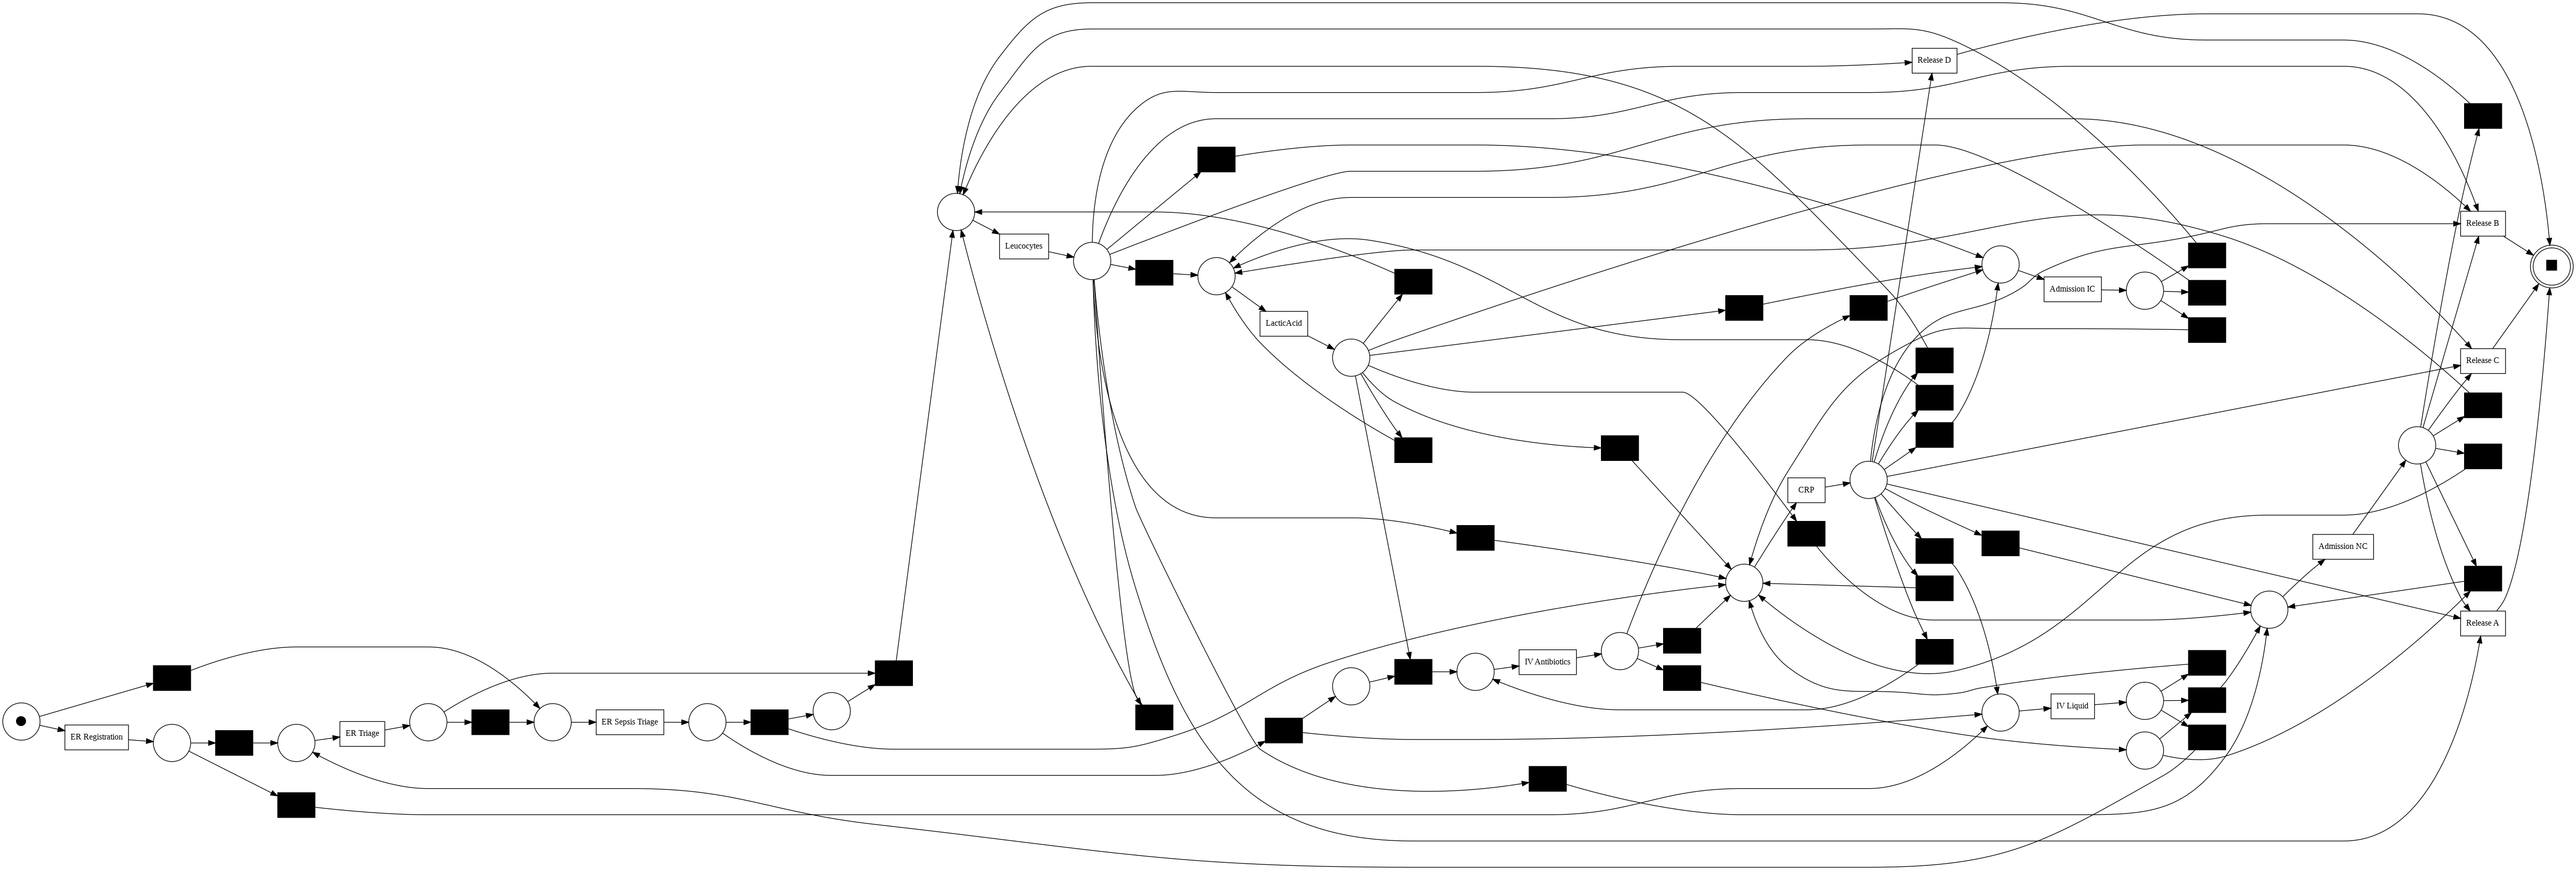

replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

Fitness: 0.9157869924469874


replaying log with TBR, completed traces ::   0%|          | 0/2962 [00:00<?, ?it/s]

Precision: 0.7048415321796617


replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

Generalization: 0.8431226987624478
Simplicity: 0.47500000000000003


replaying log with TBR, completed traces ::   0%|          | 0/425 [00:00<?, ?it/s]

case_id  is_fit  trace_fitness  missing  remaining  produced  consumed
0       823   False       0.968085        3          0        44        47
1       794   False       0.925579        3          2        33        34
2       620   False       0.934372        3          1        29        31
3        16   False       0.930736        2          1        21        22
4       438   False       0.936594        2          1        23        24
..      ...     ...            ...      ...        ...       ...       ...
453     945   False       0.859091        4          2        20        22
454     917   False       0.881410        4          2        24        26
455     759   False       0.927198        3          1        26        28
456      77   False       0.859091        4          2        20        22
457     885   False       0.897619        4          2        28        30

[458 rows x 7 columns]

In [ ]:
# log with return - Discover the model with heuristics
net, im, fm = pm4py.discover_petri_net_heuristics(log_without_return_er, dependency_threshold=0.8)
pm4py.view_petri_net(net, im, fm, format='png')

# Step 1: Evaluate Fitness
fitness_eval = pm4py.algo.evaluation.replay_fitness.algorithm.apply(
    log=log_without_return_er,
    petri_net=net,
    initial_marking=im,
    final_marking=fm
)

# Print Fitness evaluation
print(f"Fitness: {fitness_eval['log_fitness']}")

# Step 2: Evaluate Precision
precision_eval = pm4py.algo.evaluation.precision.algorithm.apply(
    log=log_without_return_er,
    net=net,
    marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Precision evaluation
print(f"Precision: {precision_eval}")

# Step 3: Evaluate Generalization
generalization_eval = pm4py.algo.evaluation.generalization.algorithm.apply(
    log=log_without_return_er,
    petri_net=net,
    initial_marking=im,  # Initial marking
    final_marking=fm  # Final marking
)

# Print Generalization evaluation
print(f"Generalization: {generalization_eval}")

# Step 4: Evaluate Simplicity
simplicity_eval = pm4py.algo.evaluation.simplicity.algorithm.apply(
    petri_net=net,
    parameters={"variant": pm4py.algo.evaluation.simplicity.algorithm.Variants.SIMPLICITY_ARC_DEGREE}
)

# Print simplicity evaluation
print(f"Simplicity: {simplicity_eval}")

# Conformance checking diagnostic

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_without_return_er, net, im, fm, return_diagnostics_dataframe=True)
# Using the parameter return_diagnostics_dataframe we can obtain diagnostics in DF format and this provide us with case_id
tbr_diagnostics



In [ ]:
## END